In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import requests
import math
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud.wordcloud import WordCloud
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, plot_confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics
from sklearn.tree import plot_tree

from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import validation_curve

In [2]:
df = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv")

C:\Users\boco7097\AppData\Local\Temp\ipykernel_7648\1291868446.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv")


In [6]:
df.head()

Health Service Area Hospital County  Operating Certificate Number  \
0          Western NY     Cattaraugus                      401001.0   
1          Western NY     Cattaraugus                      401001.0   
2          Western NY     Cattaraugus                      401001.0   
3          Western NY     Cattaraugus                      401001.0   
4          Western NY      Chautauqua                      602001.0   

   Facility Id                  Facility Name Age Group Zip Code - 3 digits  \
0         66.0         Olean General Hospital  50 to 69                 147   
1         66.0         Olean General Hospital  18 to 29                 147   
2         66.0         Olean General Hospital  30 to 49                 147   
3         66.0         Olean General Hospital  50 to 69                 147   
4        103.0  Woman's Christian Association  50 to 69                 147   

  Gender   Race          Ethnicity  ... Payment Typology 2 Payment Typology 3  \
0      F  White  Not Span/Hispanic  ...                NaN                NaN   
1      F  White  Not Span/Hispanic  ...                NaN                NaN   
2      M  White  Not Span/Hispanic  ...                NaN                NaN   
3      F  White  Not Span/Hispanic  ...                NaN                NaN   
4      M  White  Not Span/Hispanic  ...                NaN                NaN   

  Attending Provider License Number  Operating Provider License Number  \
0                          267162.0                                NaN   
1                          275408.0                                NaN   
2                          267162.0                                NaN   
3                          271326.0                                NaN   
4                          243034.0                                NaN   

   Other Provider License Number Birth Weight  Abortion Edit Indicator  \
0                            NaN            0                        N   
1                            NaN            0                        N   
2                            NaN            0                        N   
3                            NaN            0                        N   
4                            NaN            0                        N   

  Emergency Department Indicator  Total Charges Total Costs  
0                              Y       $5620.00    $4561.28  
1                              Y       $7404.18    $6933.94  
2                              Y       $7931.28    $7154.85  
3                              Y      $11304.44    $4584.11  
4                              Y       $8330.50    $4361.74  

[5 rows x 37 columns]

In [4]:
df.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [5]:
df.describe()

Operating Certificate Number   Facility Id  Discharge Year  \
count                  2.343849e+06  2.343849e+06       2346760.0   
mean                   5.007196e+06  1.043335e+03          2015.0   
std                    2.259460e+06  7.134138e+02             0.0   
min                    1.010000e+05  1.000000e+00          2015.0   
25%                    2.951001e+06  5.410000e+02          2015.0   
50%                    5.907001e+06  1.099000e+03          2015.0   
75%                    7.002012e+06  1.450000e+03          2015.0   
max                    7.004010e+06  9.431000e+03          2015.0   

       CCS Diagnosis Code  CCS Procedure Code  APR DRG Code  APR MDC Code  \
count        2.346760e+06        2.346760e+06  2.346760e+06  2.346760e+06   
mean         1.905531e+02        1.127790e+02  4.181138e+02  1.042892e+01   
std          1.596109e+02        8.893687e+01  2.413368e+02  5.923686e+00   
min          1.000000e+00        0.000000e+00  1.000000e+00  0.000000e+00   
25%          1.060000e+02        0.000000e+00  2.010000e+02  5.000000e+00   
50%          1.590000e+02        1.320000e+02  3.830000e+02  9.000000e+00   
75%          2.180000e+02        2.160000e+02  6.400000e+02  1.500000e+01   
max          9.170000e+02        9.990000e+02  9.560000e+02  2.500000e+01   

       APR Severity of Illness Code  Attending Provider License Number  \
count                  2.346760e+06                       2.343849e+06   
mean                   2.010595e+00                       2.176429e+06   
std                    8.973762e-01                       1.201747e+07   
min                    0.000000e+00                       6.150000e+02   
25%                    1.000000e+00                       1.923180e+05   
50%                    2.000000e+00                       2.294950e+05   
75%                    3.000000e+00                       2.579130e+05   
max                    4.000000e+00                       9.100000e+07   

       Operating Provider License Number  Other Provider License Number  \
count                       1.733912e+06                   7.133600e+04   
mean                        2.528763e+06                   1.297207e+07   
std                         1.290688e+07                   2.991695e+07   
min                         7.100000e+01                   1.307000e+03   
25%                         1.855150e+05                   1.835760e+05   
50%                         2.230620e+05                   2.271450e+05   
75%                         2.534160e+05                   2.634160e+05   
max                         9.100000e+07                   9.060222e+07   

       Birth Weight  
count  2.346760e+06  
mean   3.264275e+02  
std    1.000147e+03  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    9.900000e+03

# Data Wrangling

In [7]:
df.isna().sum()

Health Service Area                       2911
Hospital County                           2911
Operating Certificate Number              2911
Facility Id                               2911
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       4427
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

Drop columns with significant amount of NaNs since they don't seem relevant

In [8]:
df = df.drop(['Other Provider License Number','Payment Typology 2','Payment Typology 3','Operating Provider License Number'], axis=1)

# Drop rows with NANs for clumns which have a small number of NAN values.
df = df.dropna(subset=['APR Severity of Illness Description', 'APR Risk of Mortality','Zip Code - 3 digits','Facility Id','Attending Provider License Number'])

In [9]:
# Convert object columns to str. I will treat all entries of 120+ as simply 120.
df['Length of Stay'] = df['Length of Stay'].apply(lambda x: str(x).split(' ')[0])
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'])
df['Total Costs'] = df['Total Costs'].apply(lambda x: str(x).replace('$',''))
df['Total Costs'] = pd.to_numeric(df['Total Costs'])
df['Total Charges'] = df['Total Charges'].apply(lambda x: str(x).replace('$',''))
df['Total Charges'] = pd.to_numeric(df['Total Charges'])

# I also found 67,000 rows in Zip Code column containing "OOS" instead of a zip code. This stands for Out Of State 
# which may be significant. I will convert OOS to 999 for the purpose of this project.
df['Zip Code - 3 digits'] = df['Zip Code - 3 digits'].apply(lambda x: str(x).replace('OOS','999'))  
df['Zip Code - 3 digits'] = pd.to_numeric(df['Zip Code - 3 digits'])
display(df)

Health Service Area Hospital County  Operating Certificate Number  \
0                Western NY     Cattaraugus                      401001.0   
1                Western NY     Cattaraugus                      401001.0   
2                Western NY     Cattaraugus                      401001.0   
3                Western NY     Cattaraugus                      401001.0   
4                Western NY      Chautauqua                      602001.0   
...                     ...             ...                           ...   
2346755         Long Island         Suffolk                     5157003.0   
2346756         Long Island         Suffolk                     5157003.0   
2346757         Long Island         Suffolk                     5157003.0   
2346758         Long Island         Suffolk                     5157003.0   
2346759         Long Island         Suffolk                     5157003.0   

         Facility Id                   Facility Name    Age Group  \
0               66.0          Olean General Hospital     50 to 69   
1               66.0          Olean General Hospital     18 to 29   
2               66.0          Olean General Hospital     30 to 49   
3               66.0          Olean General Hospital     50 to 69   
4              103.0   Woman's Christian Association     50 to 69   
...              ...                             ...          ...   
2346755        943.0  St Catherine of Siena Hospital  70 or Older   
2346756        943.0  St Catherine of Siena Hospital     50 to 69   
2346757        943.0  St Catherine of Siena Hospital     50 to 69   
2346758        943.0  St Catherine of Siena Hospital  70 or Older   
2346759        943.0  St Catherine of Siena Hospital     30 to 49   

         Zip Code - 3 digits Gender   Race          Ethnicity  ...  \
0                        147      F  White  Not Span/Hispanic  ...   
1                        147      F  White  Not Span/Hispanic  ...   
2                        147      M  White  Not Span/Hispanic  ...   
3                        147      F  White  Not Span/Hispanic  ...   
4                        147      M  White  Not Span/Hispanic  ...   
...                      ...    ...    ...                ...  ...   
2346755                  117      M  White  Not Span/Hispanic  ...   
2346756                  117      M  White  Not Span/Hispanic  ...   
2346757                  119      M  White            Unknown  ...   
2346758                  117      M  White  Not Span/Hispanic  ...   
2346759                  117      M  White   Spanish/Hispanic  ...   

         APR Severity of Illness Description APR Risk of Mortality  \
0                                      Minor                 Minor   
1                                   Moderate                 Minor   
2                                      Minor                 Minor   
3                                      Minor                 Minor   
4                                   Moderate              Moderate   
...                                      ...                   ...   
2346755                             Moderate              Moderate   
2346756                                Minor                 Minor   
2346757                                Minor                 Minor   
2346758                                Minor              Moderate   
2346759                                Minor                 Minor   

        APR Medical Surgical Description        Payment Typology 1  \
0                                Medical                  Medicaid   
1                                Medical                  Medicaid   
2                                Medical                  Medicaid   
3                                Medical                  Medicare   
4                                Medical                  Medicaid   
...                                  ...                       ...   
2346755                          Medical                  Medicare   
2346756     

In [10]:
df.describe()

Operating Certificate Number   Facility Id  Zip Code - 3 digits  \
count                  2.342221e+06  2.342221e+06         2.342221e+06   
mean                   5.006227e+06  1.043141e+03         1.430993e+02   
std                    2.259531e+06  7.135456e+02         1.476467e+02   
min                    1.010000e+05  1.000000e+00         1.000000e+02   
25%                    2.951001e+06  5.410000e+02         1.090000e+02   
50%                    5.907001e+06  1.099000e+03         1.140000e+02   
75%                    7.002009e+06  1.450000e+03         1.290000e+02   
max                    7.004010e+06  9.431000e+03         9.990000e+02   

       Length of Stay  Discharge Year  CCS Diagnosis Code  CCS Procedure Code  \
count    2.342221e+06       2342221.0        2.342221e+06        2.342221e+06   
mean     5.480060e+00          2015.0        1.905596e+02        1.127538e+02   
std      8.035354e+00             0.0        1.597189e+02        8.897563e+01   
min      1.000000e+00          2015.0        1.000000e+00        0.000000e+00   
25%      2.000000e+00          2015.0        1.060000e+02        0.000000e+00   
50%      3.000000e+00          2015.0        1.580000e+02        1.320000e+02   
75%      6.000000e+00          2015.0        2.180000e+02        2.160000e+02   
max      1.200000e+02          2015.0        9.170000e+02        9.990000e+02   

       APR DRG Code  APR MDC Code  APR Severity of Illness Code  \
count  2.342221e+06  2.342221e+06                  2.342221e+06   
mean   4.178865e+02  1.042384e+01                  2.011237e+00   
std    2.414170e+02  5.926276e+00                  8.974071e-01   
min    1.000000e+00  1.000000e+00                  1.000000e+00   
25%    2.000000e+02  5.000000e+00                  1.000000e+00   
50%    3.830000e+02  9.000000e+00                  2.000000e+00   
75%    6.400000e+02  1.500000e+01                  3.000000e+00   
max    9.520000e+02  2.500000e+01                  4.000000e+00   

       Attending Provider License Number  Birth Weight  Total Charges  \
count                       2.342221e+06  2.342221e+06   2.342221e+06   
mean                        2.176400e+06  3.264818e+02   4.323095e+04   
std                         1.201709e+07  1.000243e+03   8.046165e+04   
min                         6.150000e+02  0.000000e+00   1.000000e-02   
25%                         1.923170e+05  0.000000e+00   1.203386e+04   
50%                         2.294950e+05  0.000000e+00   2.350105e+04   
75%                         2.579100e+05  0.000000e+00   4.664500e+04   
max                         9.100000e+07  9.900000e+03   7.248391e+06   

        Total Costs  
count  2.342221e+06  
mean   1.599223e+04  
std    3.239425e+04  
min    0.000000e+00  
25%    4.725780e+03  
50%    8.797000e+03  
75%    1.684466e+04  
max    5.236615e+06

In [11]:
# Make a heatmap
df.corr()

Operating Certificate Number  Facility Id  \
Operating Certificate Number                           1.000000     0.671427   
Facility Id                                            0.671427     1.000000   
Zip Code - 3 digits                                   -0.008948    -0.009727   
Length of Stay                                         0.019773     0.004807   
Discharge Year                                              NaN          NaN   
CCS Diagnosis Code                                     0.037451     0.023708   
CCS Procedure Code                                     0.182444     0.165177   
APR DRG Code                                           0.041818     0.049937   
APR MDC Code                                           0.042960     0.047917   
APR Severity of Illness Code                          -0.040274    -0.048904   
Attending Provider License Number                      0.014907    -0.011606   
Birth Weight                                           0.016243     0.064506   
Total Charges                                          0.079536     0.043598   
Total Costs                                            0.089602     0.039116   

                                   Zip Code - 3 digits  Length of Stay  \
Operating Certificate Number                 -0.008948        0.019773   
Facility Id                                  -0.009727        0.004807   
Zip Code - 3 digits                           1.000000       -0.000521   
Length of Stay                               -0.000521        1.000000   
Discharge Year                                     NaN             NaN   
CCS Diagnosis Code                           -0.012238        0.112335   
CCS Procedure Code                           -0.025490        0.042104   
APR DRG Code                                 -0.024196        0.073869   
APR MDC Code                                 -0.020768        0.102193   
APR Severity of Illness Code                  0.002322        0.346384   
Attending Provider License Number            -0.000657        0.001762   
Birth Weight                                 -0.020364       -0.063525   
Total Charges                                 0.037635        0.705733   
Total Costs                                   0.033836        0.681471   

                                   Discharge Year  CCS Diagnosis Code  \
Operating Certificate Number                  NaN            0.037451   
Facility Id                                   NaN            0.023708   
Zip Code - 3 digits                           NaN           -0.012238   
Length of Stay                                NaN            0.112335   
Discharge Year                                NaN                 NaN   
CCS Diagnosis Code                            NaN            1.000000   
CCS Procedure Code                            NaN            0.117378   
APR DRG Code                                  NaN            0.440546   
APR MDC Code                                  NaN            0.460501   
APR Severity of Illness Code                  NaN           -0.192301   
Attending Provider License Number             NaN            0.046578   
Birth Weight                                  NaN            0.055410   
Total Charges                                 NaN           -0.086666   
Total Costs                                   NaN           -0.059513   

                                   CCS Procedure Code  APR DRG Code  \
Operating Certificate Number                 0.182444      0.041818   
Facility Id                                  0.165177      0.049937   
Zip Code - 3 digits                         -0.025490     -0.024196   
Length of Stay                               0.042104      0.073869   
Discharge Year                                    NaN           NaN   
CCS Diagnosis Code                           0.117378      0.440546   
CCS Procedure Code                           1.000000      0.193458   
APR DRG Code                                 0.193458      

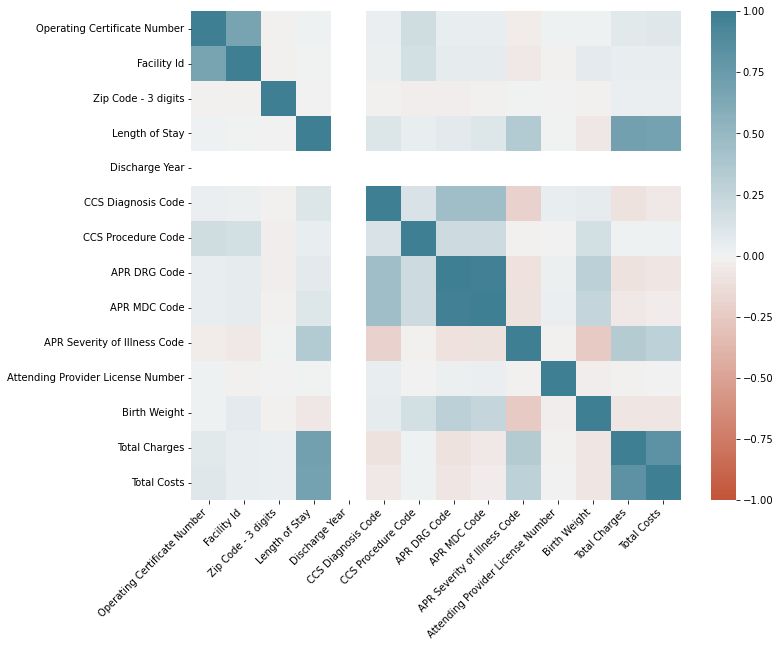

In [12]:
f, ax = plt.subplots(figsize=(11, 9))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From this inital look at correlation matrix, we can see that a couple of features have relatively strong positive correlation with each other and with Length of Stay. APR Severity of Illness Code, Total Charges and Total Costs all have strong positive correlation with Length of Stay.

# Exploratory Data Analysis & Data Visualization
In this section I will explore and visualize underlying relationships in the data. I keep Length of Stay as the primary variable along the y-axis since it is the predictor variable for this project. I'm trying to find features in this dataset that affect length of stay. Features found to have the most variance in length of stay are:
- Payment Typology
- Severity of Illness
- Age Group
- Type of Admission

Let's look at univariate distribution of Length of Stay values in the dataset

C:\Users\boco7097\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


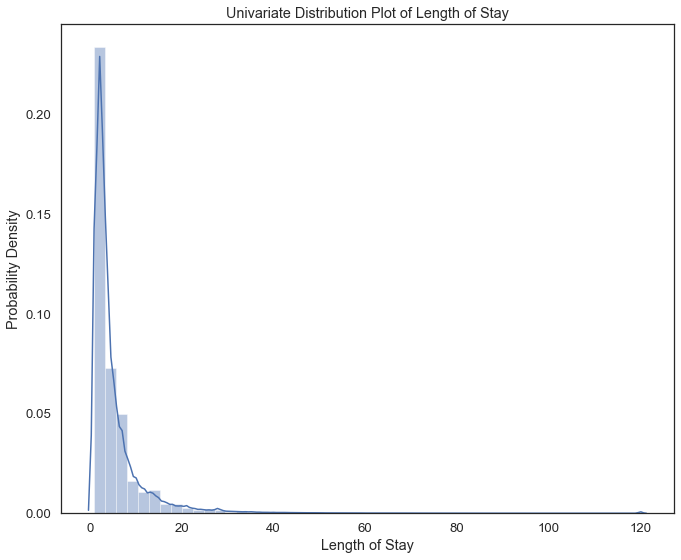

In [13]:
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(df['Length of Stay'], norm_hist=False);
plt.ylabel('Probability Density')
plt.title('Univariate Distribution Plot of Length of Stay')
plt.show()

C:\Users\boco7097\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


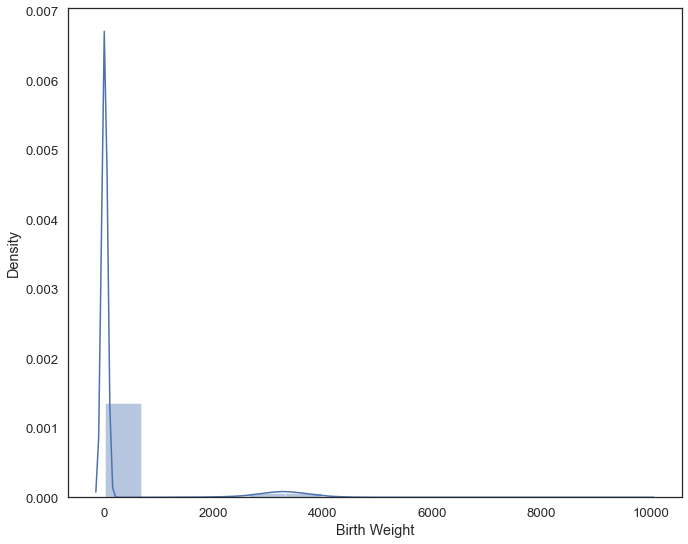

In [14]:
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(df['Birth Weight'], bins=15);

In [15]:
#Lets see if we can confirm that there is data only input for the youngest age group

birth_weight_df = df[['Type of Admission', 'Birth Weight']].groupby('Type of Admission').mean()
display(birth_weight_df)
weight_age_df = df[['Age Group', 'Birth Weight']].groupby('Age Group').mean()
display(weight_age_df)

Birth Weight
Type of Admission              
Elective               5.034854
Emergency             10.307987
Newborn             3259.013067
Not Available         42.820513
Trauma                 2.205882
Urgent                47.163954

Birth Weight
Age Group                
0 to 17        2172.11362
18 to 29          0.00000
30 to 49          0.00000
50 to 69          0.00000
70 or Older       0.00000

C:\Users\boco7097\AppData\Local\Temp\ipykernel_7648\161469030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth_youngest_stay['Birth Weight'] = birth_youngest_stay['Birth Weight'].apply(lambda x: float(x/454)) #convert from grams to pounds


<AxesSubplot:xlabel='Birth Weight', ylabel='Length of Stay'>

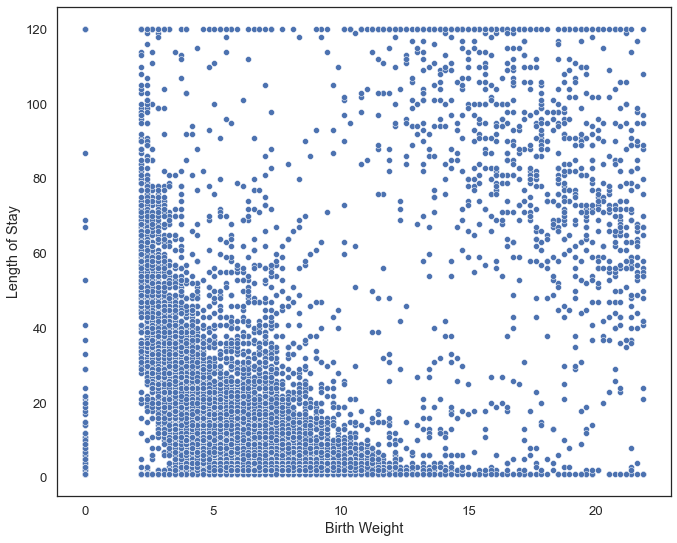

In [16]:
birth_youngest_stay = df[df['Type of Admission'].str.contains('Newborn')]
birth_youngest_stay['Birth Weight'] = birth_youngest_stay['Birth Weight'].apply(lambda x: float(x/454)) #convert from grams to pounds
f, ax = plt.subplots(figsize=(11, 9))
sns.scatterplot(x="Birth Weight", y="Length of Stay",
                data=birth_youngest_stay)

In [17]:
longest_newborn_df = birth_youngest_stay[birth_youngest_stay['Length of Stay']==120]
display(longest_newborn_df)

Health Service Area Hospital County  Operating Certificate Number  \
45429            Western NY            Erie                     1401014.0   
45432            Western NY            Erie                     1401014.0   
45435            Western NY            Erie                     1401014.0   
45437            Western NY            Erie                     1401014.0   
45438            Western NY            Erie                     1401014.0   
...                     ...             ...                           ...   
2062660         Long Island          Nassau                     2908000.0   
2066041         Long Island          Nassau                     2908000.0   
2069788         Long Island          Nassau                     2908000.0   
2301522         Long Island         Suffolk                     5154001.0   
2311437         Long Island         Suffolk                     5154001.0   

         Facility Id                             Facility Name Age Group  \
45429          208.0  Women And Children's Hospital Of Buffalo   0 to 17   
45432          208.0  Women And Children's Hospital Of Buffalo   0 to 17   
45435          208.0  Women And Children's Hospital Of Buffalo   0 to 17   
45437          208.0  Women And Children's Hospital Of Buffalo   0 to 17   
45438          208.0  Women And Children's Hospital Of Buffalo   0 to 17   
...              ...                                       ...       ...   
2062660        511.0              Winthrop-University Hospital   0 to 17   
2066041        511.0              Winthrop-University Hospital   0 to 17   
2069788        511.0              Winthrop-University Hospital   0 to 17   
2301522        925.0    Good Samaritan Hospital Medical Center   0 to 17   
2311437        925.0    Good Samaritan Hospital Medical Center   0 to 17   

         Zip Code - 3 digits Gender                    Race  \
45429                    140      F                   White   
45432                    142      F                   White   
45435                    142      M                   White   
45437                    142      M  Black/African American   
45438                    142      M  Black/African American   
...                      ...    ...                     ...   
2062660                  115      M  Black/African American   
2066041                  115      F              Other Race   
2069788                  115      F  Black/African American   
2301522                  117      F                   White   
2311437                  117      M  Black/African American   

                 Ethnicity  ...  APR Severity of Illness Description  \
45429     Spanish/Hispanic  ...                                Major   
45432    Not Span/Hispanic  ...                              Extreme   
45435    Not Span/Hispanic  ...                              Extreme   
45437    Not Span/Hispanic  ...                              Extreme   
45438    Not Span/Hispanic  ...                              Extreme   
...                    ...  ...                                  ...   
2062660  Not Span/Hispanic  ...                              Extreme   
2066041            Unknown  ...                             Moderate   
2069788  Not Span/Hispanic  ...                                Major   
2301522  Not Span/Hispanic  ...                                Major   
2311437  Not Span/Hispanic  ...                              Extreme   

        APR Risk of Mortality APR Medical Surgical Description  \
45429                   Major                         Surgical   
45432                 Extreme                         Surgical   
45435                   Major                         Surgical   
45437                 Extreme                          Medical   
45438                 Extreme                         Surgical   
...                       ...                              ...   
2062660                 Major                          Medical   
2066041             

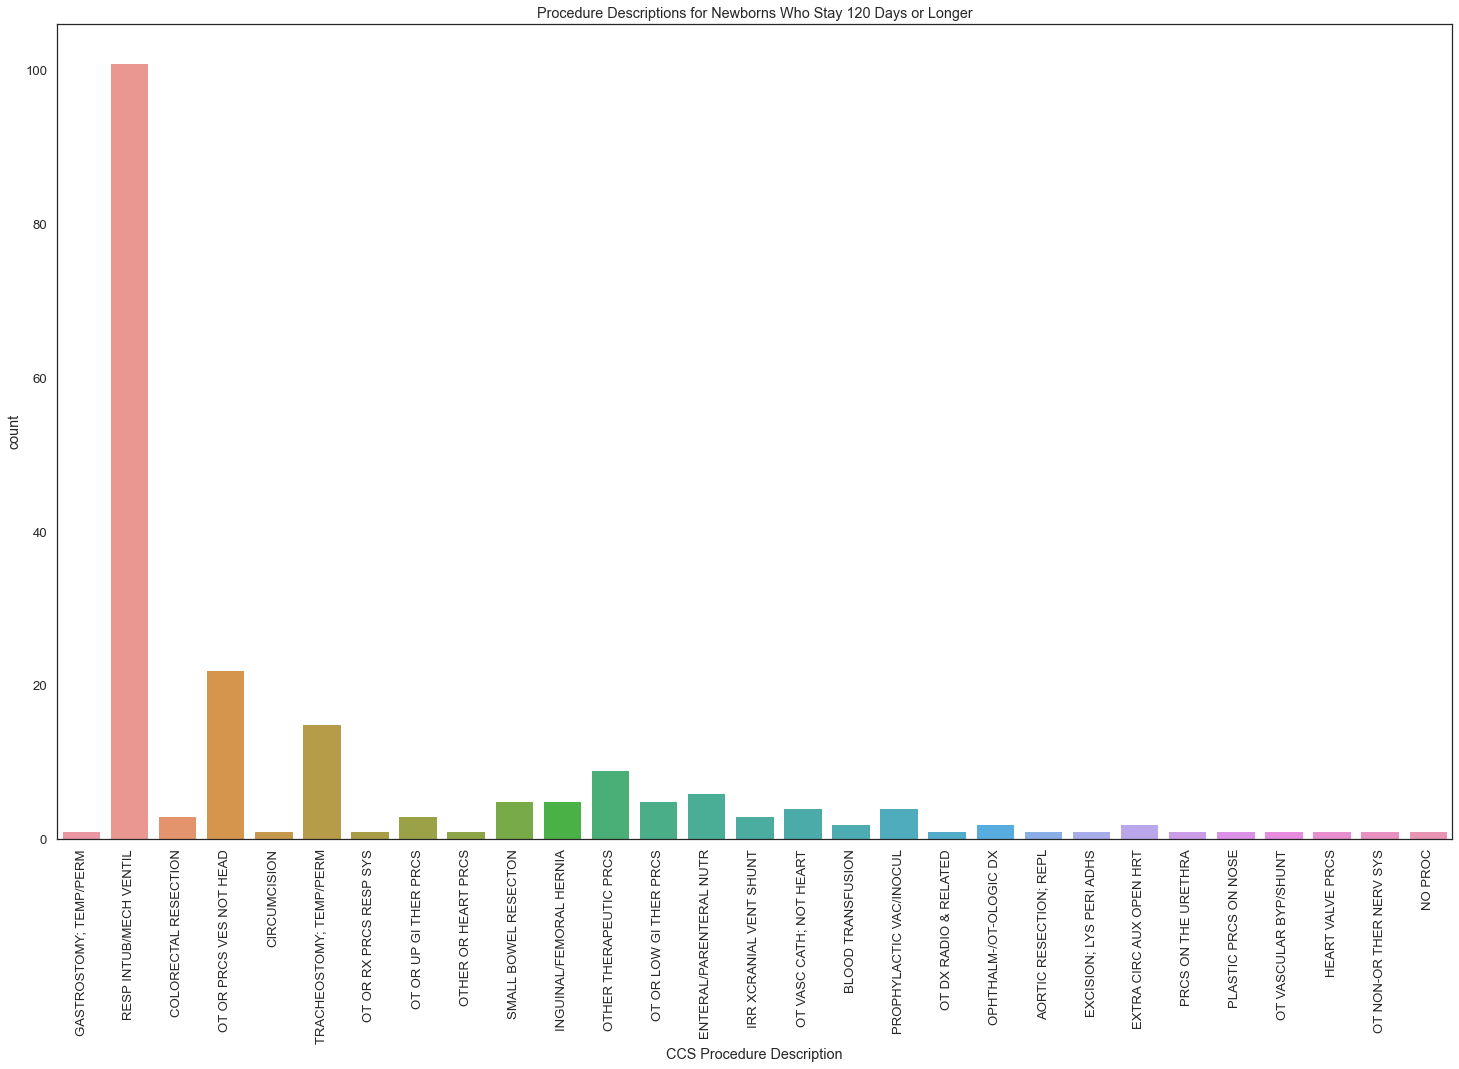

In [18]:
f, ax = plt.subplots(figsize=(25, 15))
sns.countplot(x='CCS Procedure Description', data = longest_newborn_df)
plt.xticks(rotation=90)
plt.title('Procedure Descriptions for Newborns Who Stay 120 Days or Longer')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Length of Stay'>

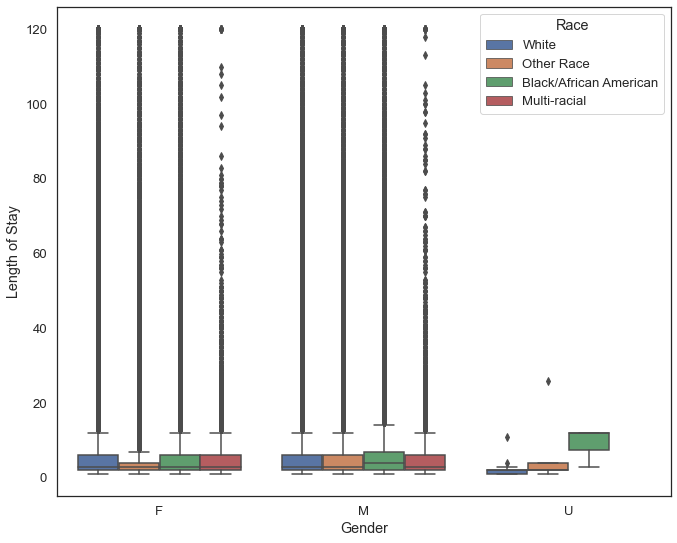

In [19]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Gender", y="Length of Stay",
            hue="Race",
            data=df)

[(0.0, 30.0)]

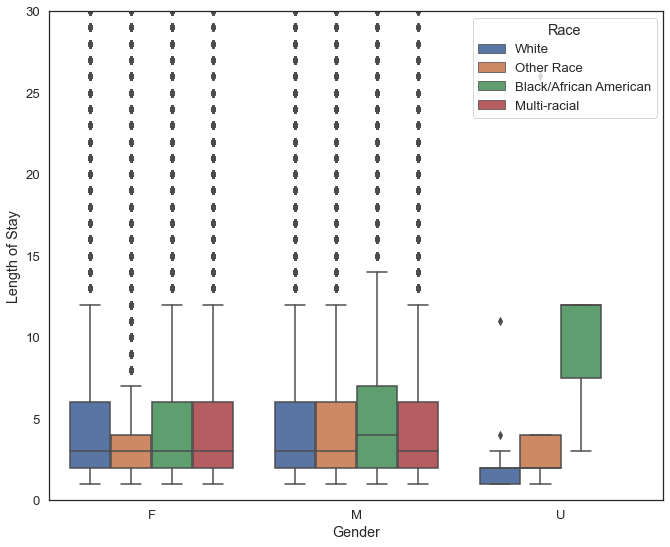

In [20]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Gender", y="Length of Stay",
            hue="Race",
            data=df)
ax.set(ylim=(0, 30))

[(0.0, 30.0)]

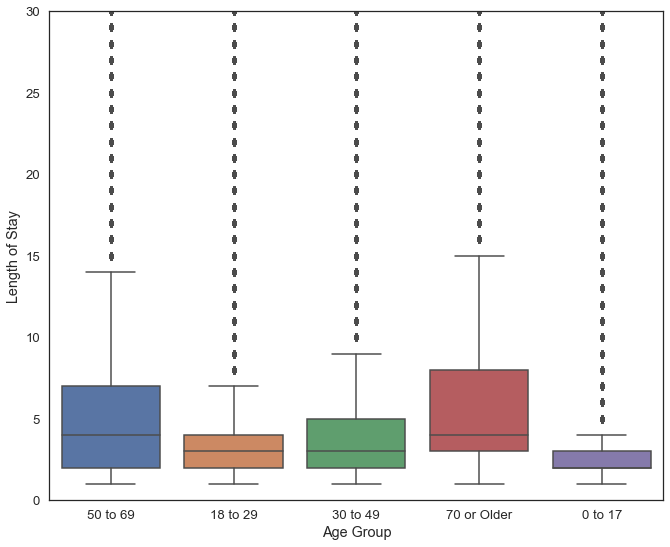

In [21]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Age Group", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 30))

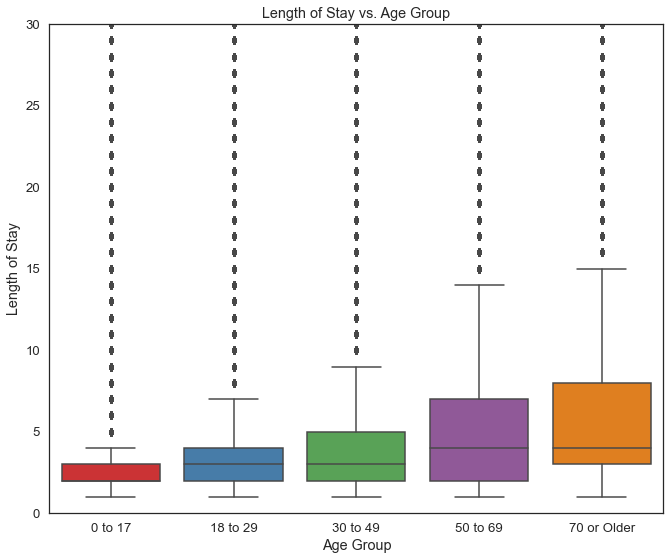

In [22]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Age Group", y="Length of Stay", order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'],
            palette="Set1", data=df)
ax.set(ylim=(0, 30))
plt.title('Length of Stay vs. Age Group')
plt.show()

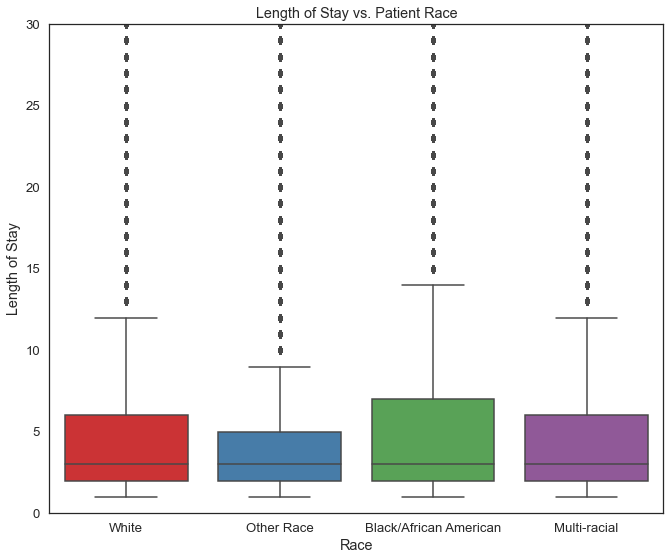

In [23]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Race", y="Length of Stay", data=df, palette='Set1')
plt.title('Length of Stay vs. Patient Race')
ax.set(ylim=(0, 30))
plt.show()

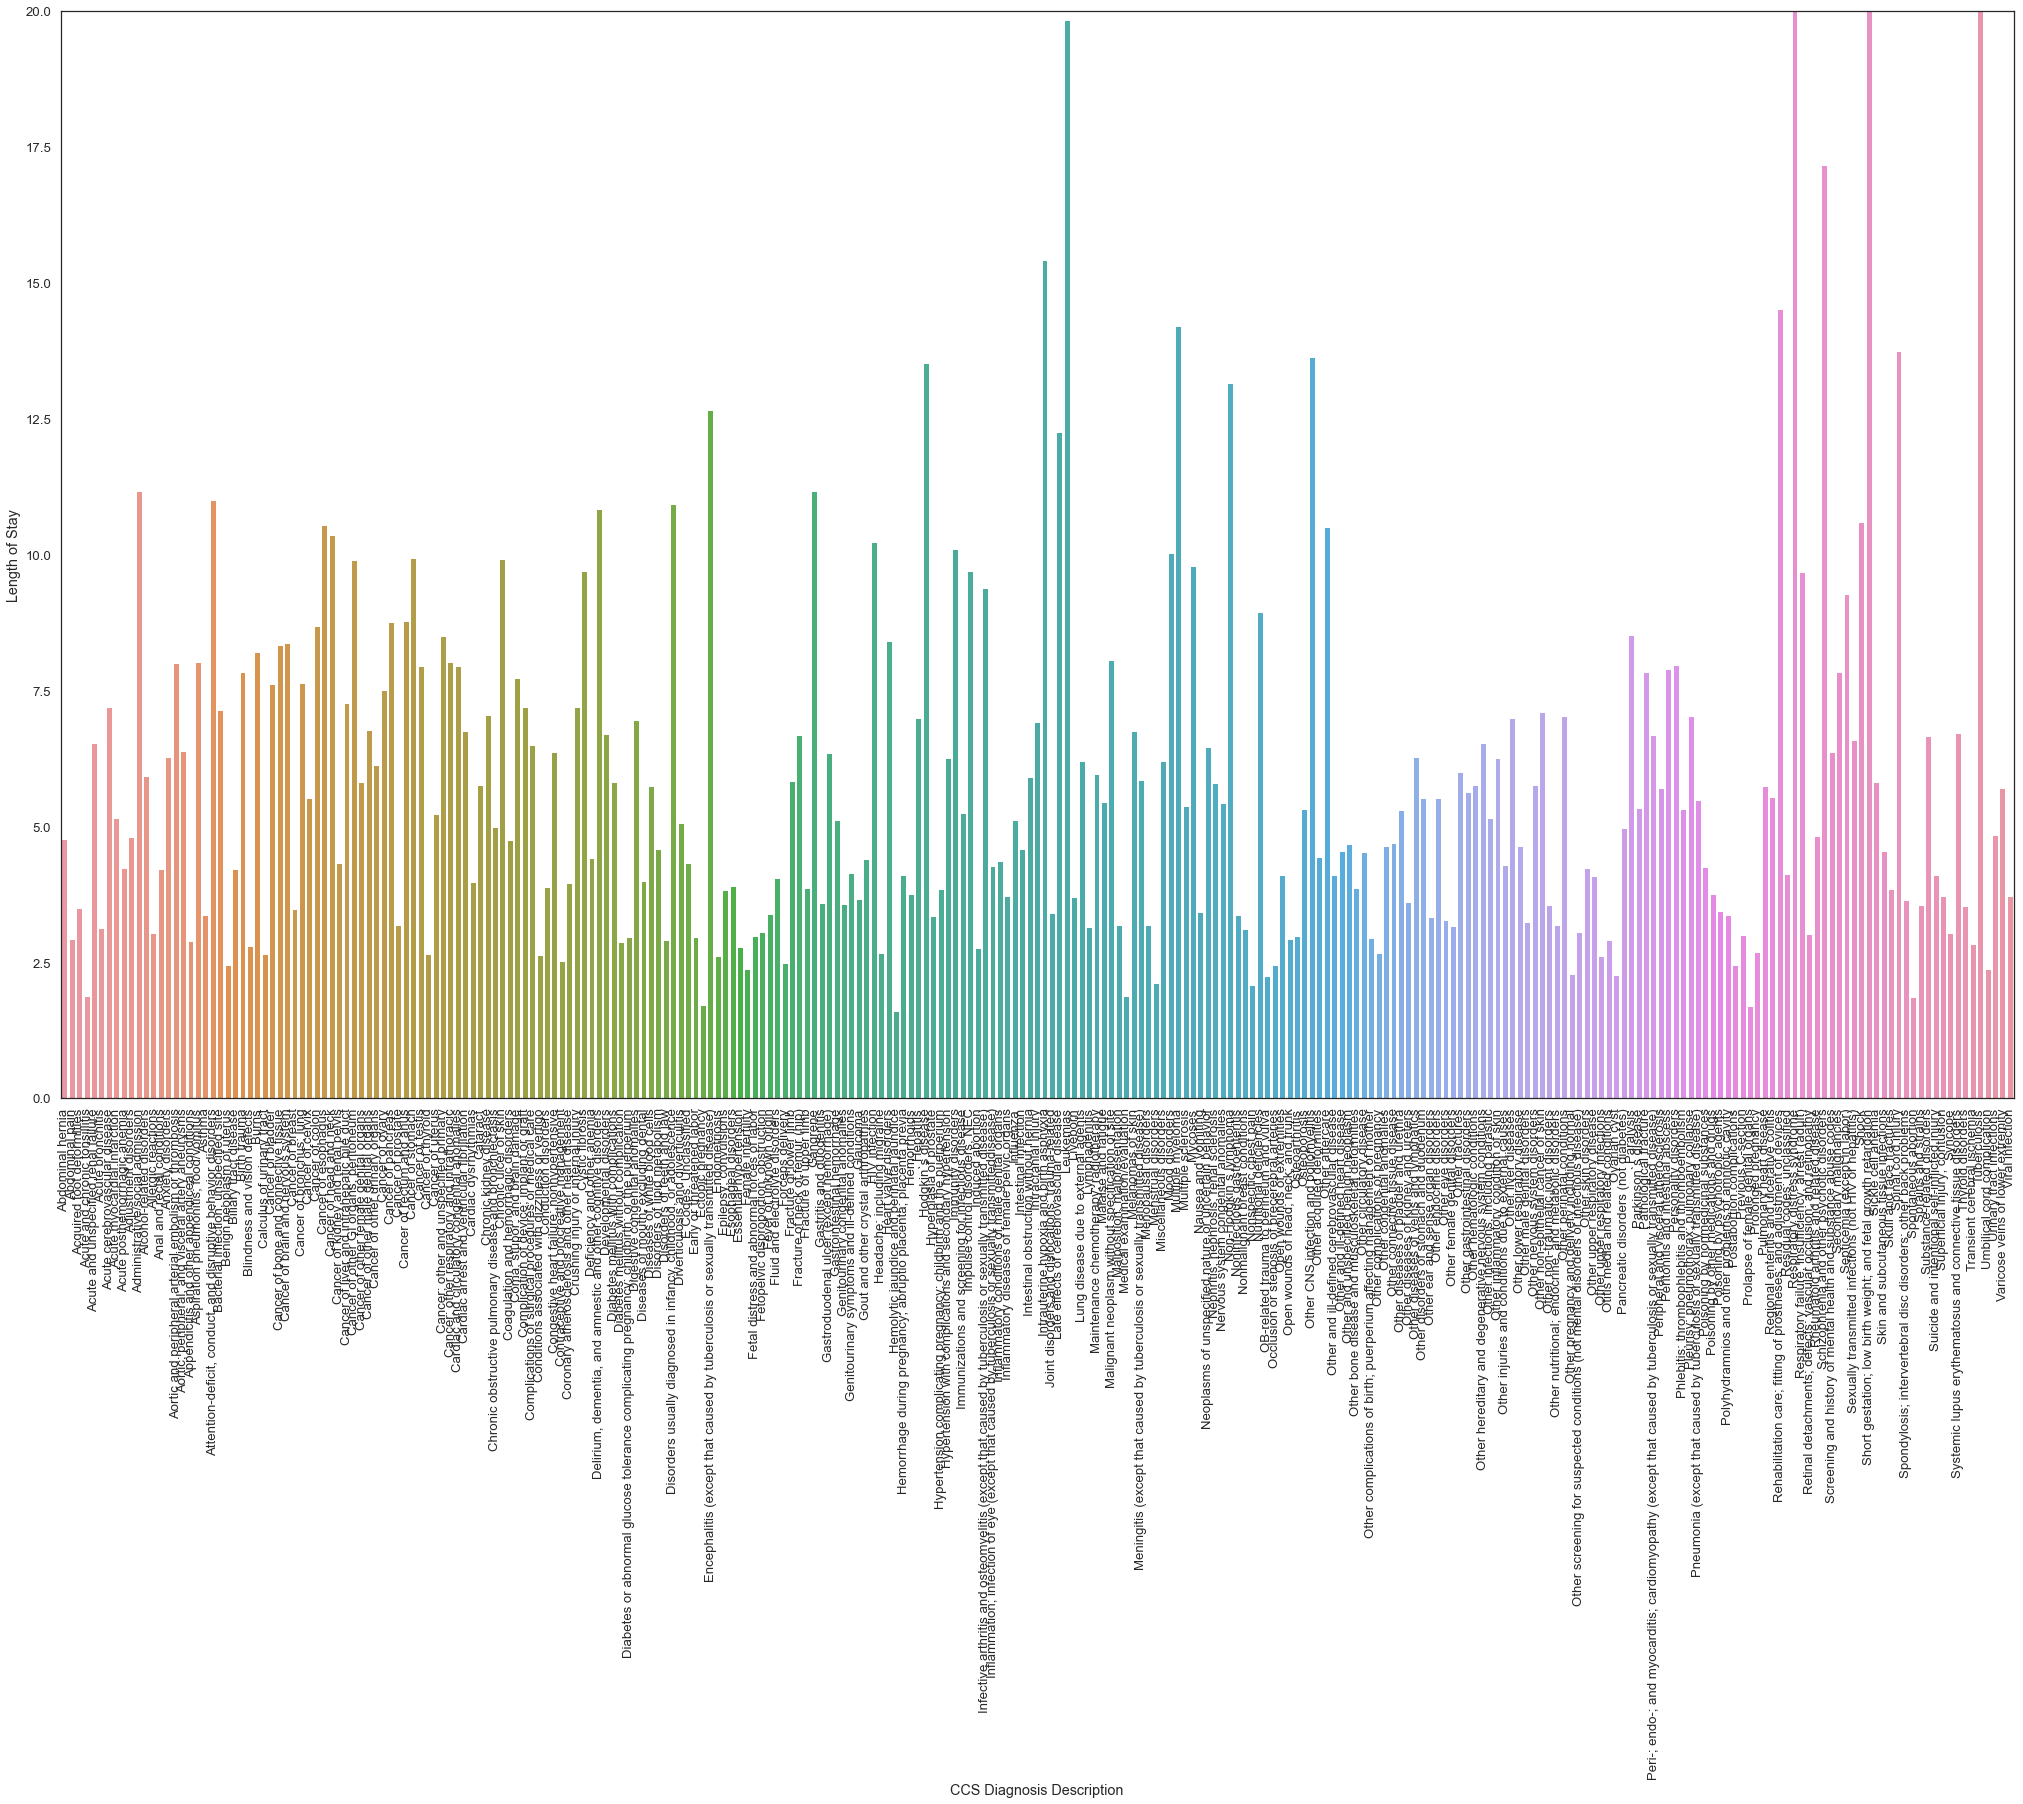

In [24]:
f, ax = plt.subplots(figsize=(35, 20))
sns.barplot(x="CCS Diagnosis Description", y="Length of Stay", data=df[['CCS Diagnosis Description','Length of Stay']].groupby('CCS Diagnosis Description', as_index=False).mean())
ax.set(ylim=(0, 20))
plt.xticks(rotation=90)
plt.show()

In [25]:
diag_stay_df = df[['CCS Diagnosis Description','Length of Stay']].groupby('CCS Diagnosis Description', as_index=False).mean()
diag_stay_df = diag_stay_df.sort_values(by='Length of Stay', ascending=False, ignore_index=True)
display(diag_stay_df)

CCS Diagnosis Description  Length of Stay
0    Short gestation; low birth weight; and fetal g...       31.591017
1                        Respiratory distress syndrome       23.727660
2                                         Tuberculosis       21.489237
3                                            Leukemias       19.822296
4          Schizophrenia and other psychotic disorders       17.168233
..                                                 ...             ...
258                      Acute and chronic tonsillitis        1.870309
259                               Spontaneous abortion        1.851351
260                                  Ectopic pregnancy        1.705751
261                  Prolapse of female genital organs        1.683635
262          Hemolytic jaundice and perinatal jaundice        1.604728

[263 rows x 2 columns]

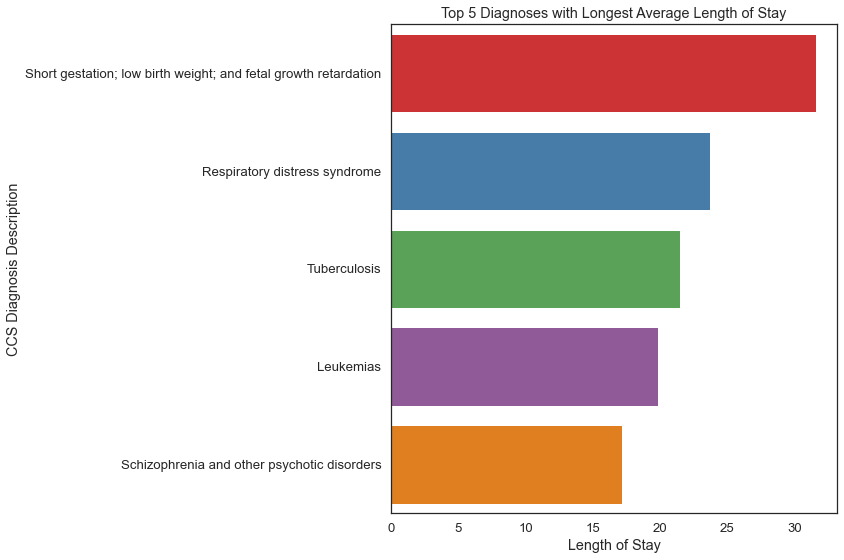

In [26]:
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))
sns.barplot(y="CCS Diagnosis Description", x="Length of Stay", data=diag_stay_df[0:5], palette='Set1')
#plt.xticks(rotation=45)
plt.title('Top 5 Diagnoses with Longest Average Length of Stay')
plt.show()

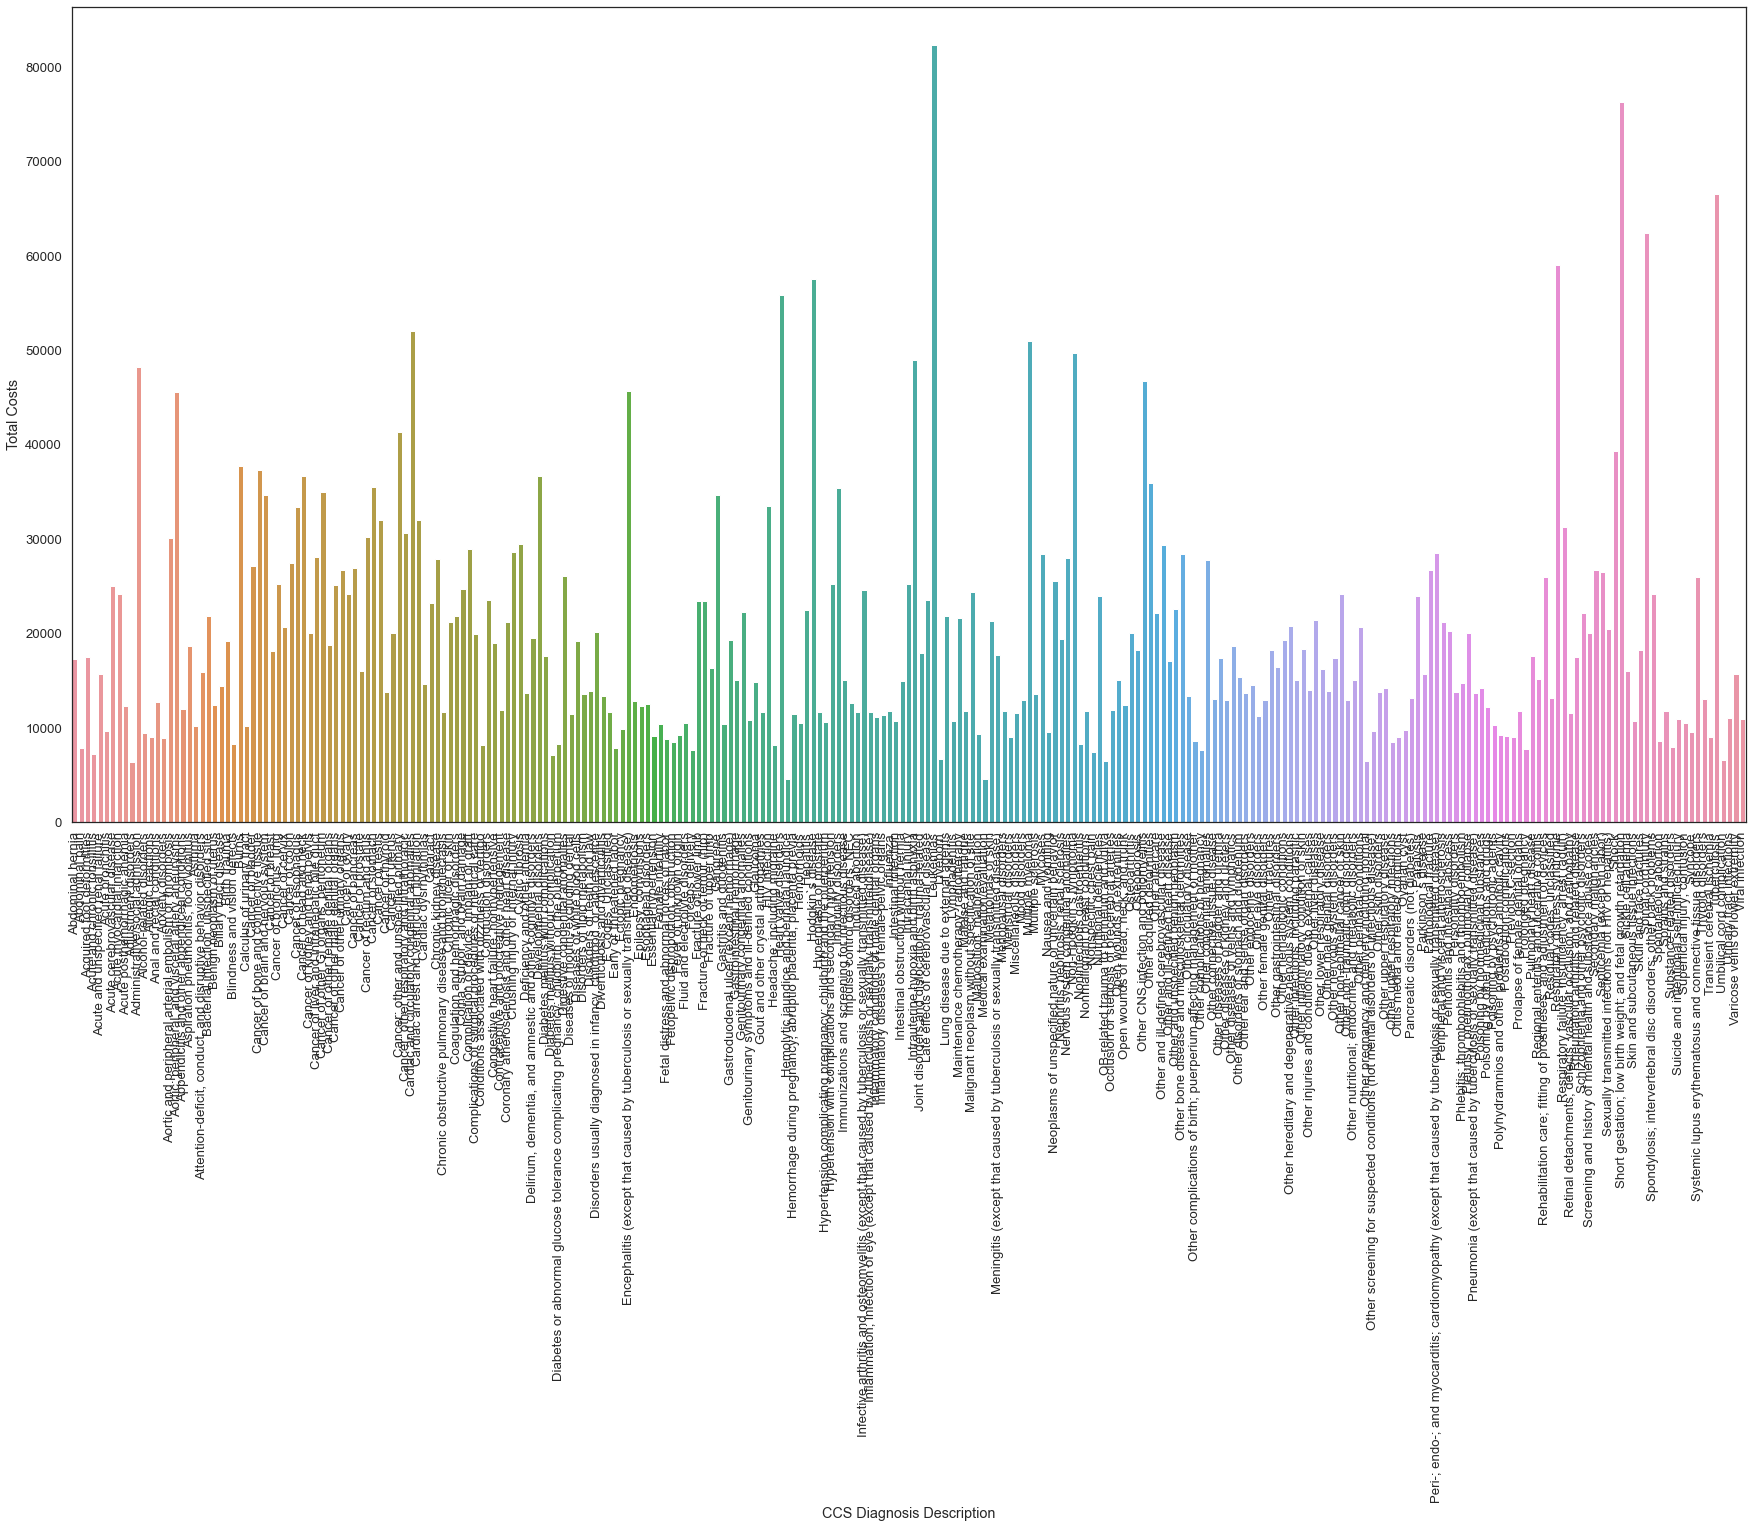

In [27]:
f, ax = plt.subplots(figsize=(30, 15))
sns.barplot(x="CCS Diagnosis Description", y="Total Costs", data=df[['CCS Diagnosis Description','Total Costs']].groupby('CCS Diagnosis Description', as_index=False).mean())
plt.xticks(rotation=90)
plt.show()

In [28]:
diag_costs_df = df[['CCS Diagnosis Description','Total Costs']].groupby('CCS Diagnosis Description', as_index=False).mean()
diag_costs_df = diag_costs_df.sort_values(by='Total Costs', ascending=False, ignore_index=True)
display(diag_costs_df)

CCS Diagnosis Description   Total Costs
0                                            Leukemias  82255.539414
1    Short gestation; low birth weight; and fetal g...  76227.177045
2                                         Tuberculosis  66563.343562
3                                   Spinal cord injury  62398.305067
4                        Respiratory distress syndrome  59006.072000
..                                                 ...           ...
258            OB-related trauma to perineum and vulva   6491.679341
259      Other pregnancy and delivery including normal   6419.875510
260                               Adjustment disorders   6325.364765
261          Hemolytic jaundice and perinatal jaundice   4596.355803
262                     Medical examination/evaluation   4502.010203

[263 rows x 2 columns]

In [29]:
#Rank the total costs and then do an inner join
diag_costs_df = diag_costs_df.reset_index()
joined_df = diag_stay_df.merge(right=diag_costs_df, how='inner', on='CCS Diagnosis Description')
display(joined_df)

CCS Diagnosis Description  Length of Stay  index  \
0    Short gestation; low birth weight; and fetal g...       31.591017      1   
1                        Respiratory distress syndrome       23.727660      4   
2                                         Tuberculosis       21.489237      2   
3                                            Leukemias       19.822296      0   
4          Schizophrenia and other psychotic disorders       17.168233     80   
..                                                 ...             ...    ...   
258                      Acute and chronic tonsillitis        1.870309    254   
259                               Spontaneous abortion        1.851351    239   
260                                  Ectopic pregnancy        1.705751    219   
261                  Prolapse of female genital organs        1.683635    186   
262          Hemolytic jaundice and perinatal jaundice        1.604728    261   

      Total Costs  
0    76227.177045  
1    59006.072000  
2    66563.343562  
3    82255.539414  
4    22106.462457  
..            ...  
258   7233.839857  
259   8594.514324  
260   9876.683682  
261  11742.817702  
262   4596.355803  

[263 rows x 4 columns]

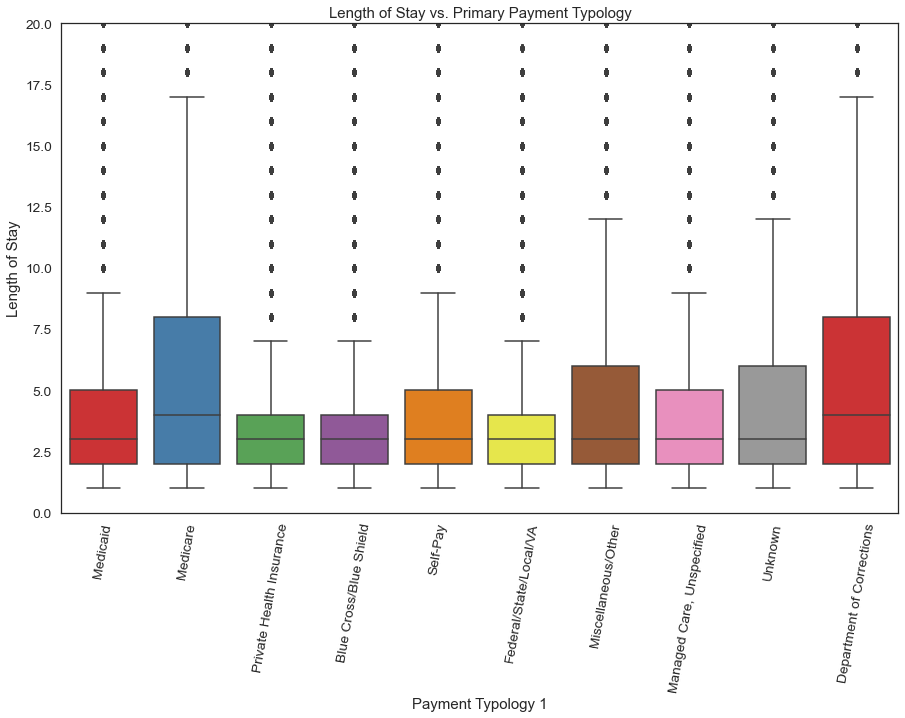

In [30]:
sns.set(font_scale=1.25)
sns.set_style("white")
f, ax = plt.subplots(figsize=(15, 9))
sns.boxplot(x="Payment Typology 1", y="Length of Stay", data=df, palette='Set1')
ax.set(ylim=(0, 20))
plt.xticks(rotation=80)
plt.title('Length of Stay vs. Primary Payment Typology')
plt.show()

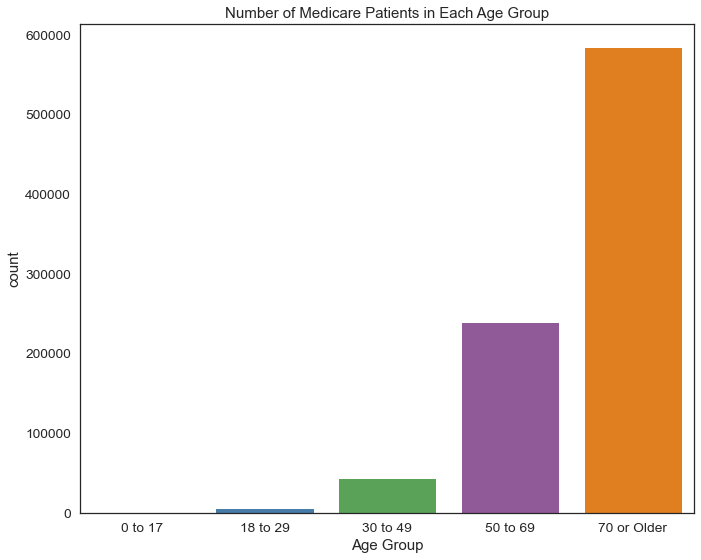

In [31]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x='Age Group', data = df[df['Payment Typology 1']=='Medicare'], order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'], palette='Set1')
plt.title('Number of Medicare Patients in Each Age Group')
plt.show()

[(0.0, 20.0)]

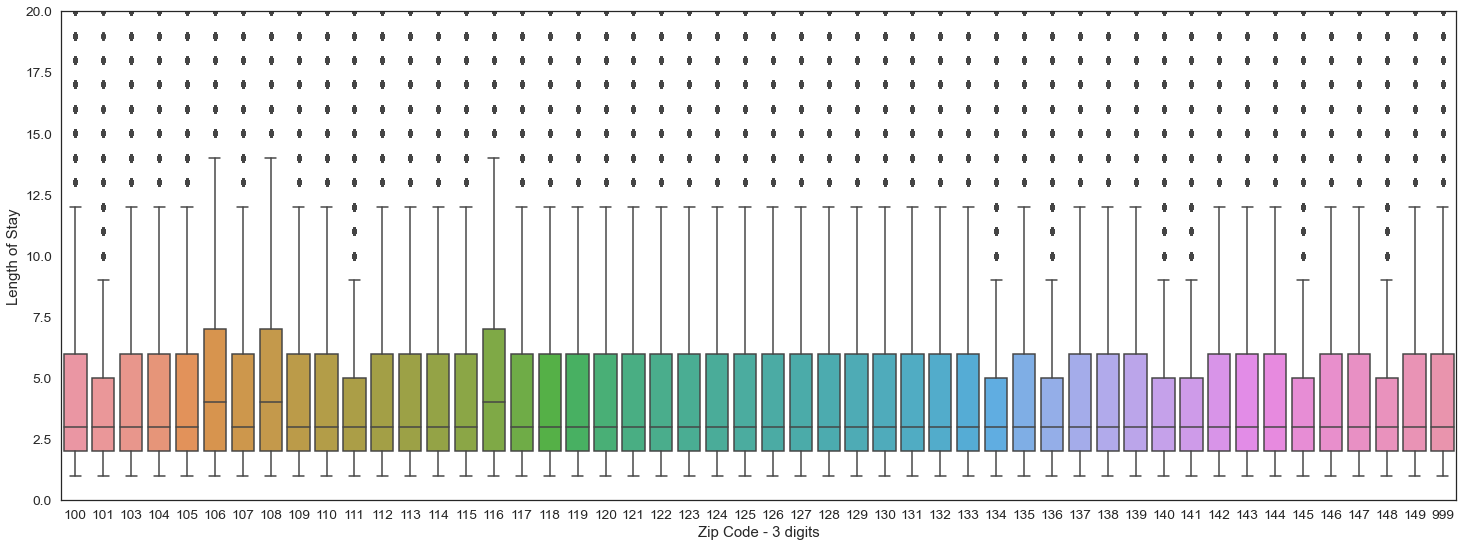

In [32]:
f, ax = plt.subplots(figsize=(25, 9))
sns.boxplot(x="Zip Code - 3 digits", y="Length of Stay", data=df)
ax.set(ylim=(0, 20))

[(0.0, 20.0)]

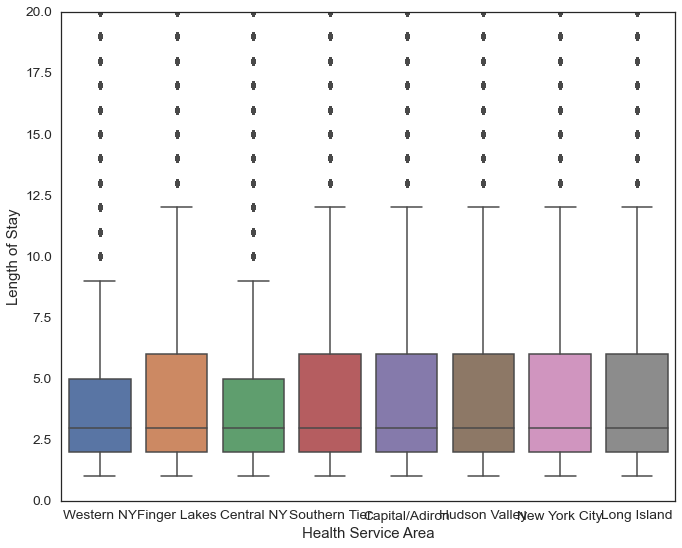

In [33]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Health Service Area", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 20))

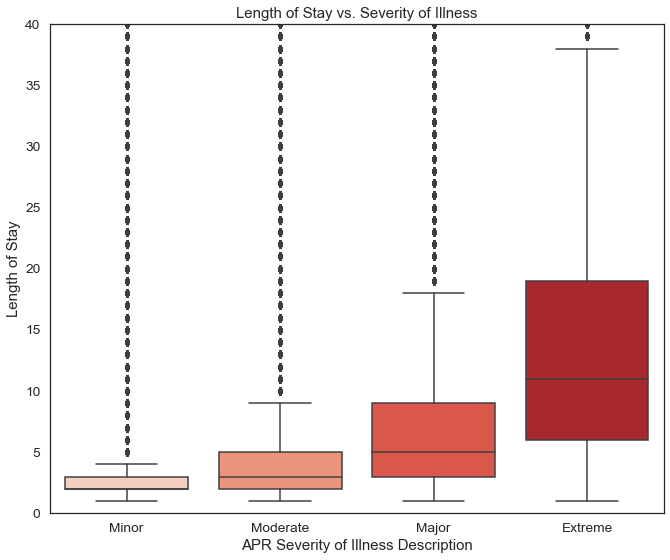

In [34]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="APR Severity of Illness Description", y="Length of Stay",
            data=df, palette='Reds')
ax.set(ylim=(0, 40))
plt.title('Length of Stay vs. Severity of Illness')
plt.show()

[(0.0, 20.0)]

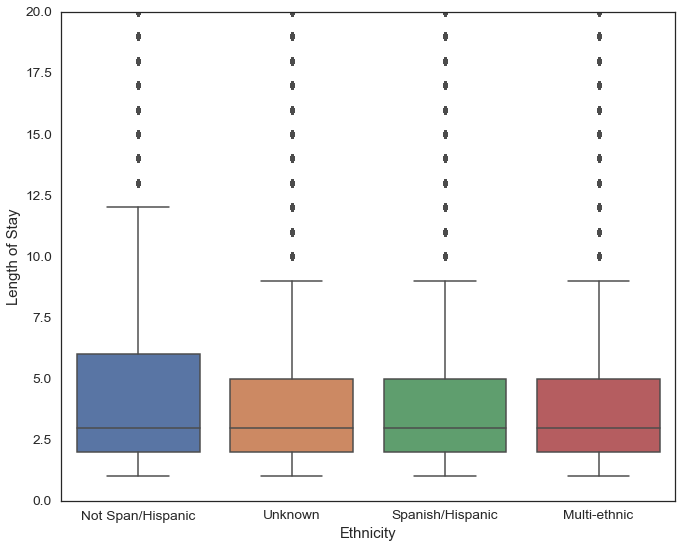

In [35]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Ethnicity", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 20))

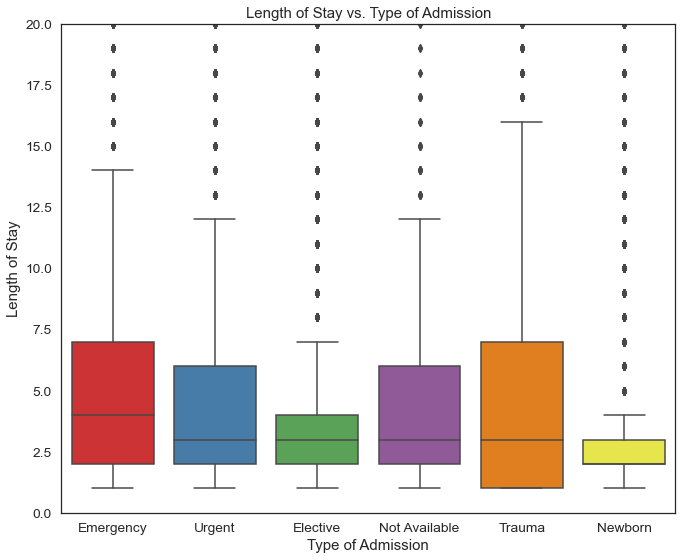

In [36]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Type of Admission", y="Length of Stay",
            data=df, palette='Set1')
plt.title('Length of Stay vs. Type of Admission')
ax.set(ylim=(0, 20))
plt.show()

<AxesSubplot:xlabel='Length of Stay', ylabel='Total Costs'>

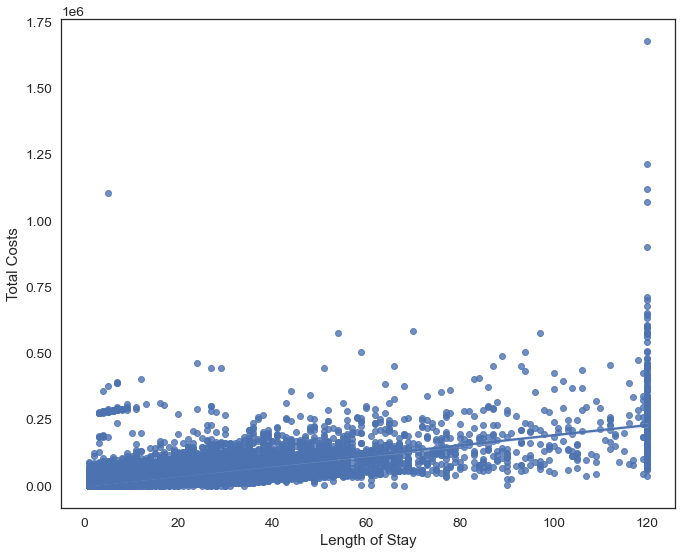

In [37]:
f, ax = plt.subplots(figsize=(11, 9))
sns.regplot(x="Length of Stay", y="Total Costs",
            data=df[0:200000])

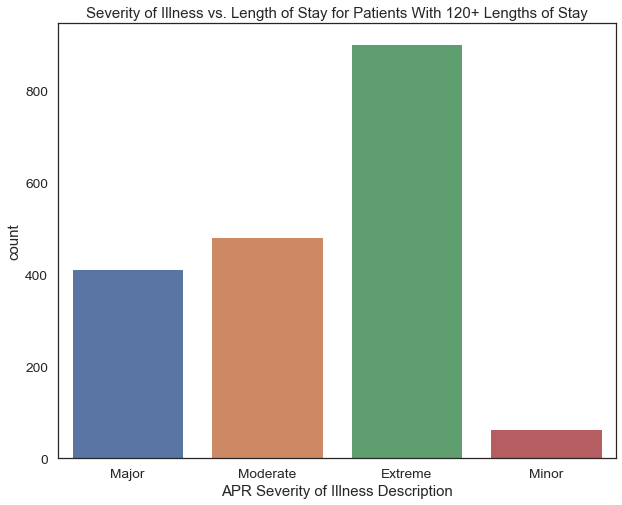

In [38]:
f, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='APR Severity of Illness Description', data = df[df['Length of Stay']==120])
plt.title('Severity of Illness vs. Length of Stay for Patients With 120+ Lengths of Stay')
plt.show()

# Drop Columns

C:\Users\boco7097\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\boco7097\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\boco7097\AppData\Local\Temp\ipykernel_7648\2502487303.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


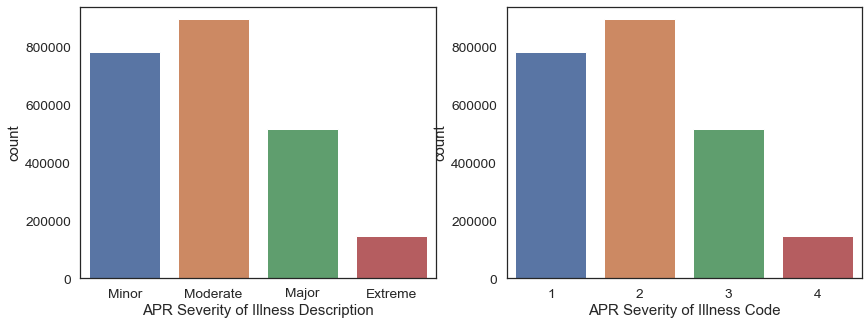

In [39]:
fig, ax =plt.subplots(1,2, figsize=(14,5))
sns.countplot(df['APR Severity of Illness Description'], ax=ax[0])
sns.countplot(df['APR Severity of Illness Code'], ax=ax[1])
fig.show()

df = df.drop(['APR Severity of Illness Description'], axis=1)  #after confirming the illness code column encodes the same information

In [40]:
num_county = df['Hospital County'].unique().tolist()
num_zip = df['Zip Code - 3 digits'].unique().tolist()
print("Number of Hospital County's:",len(num_county))
print("Number of Zipcodes:",len(num_zip))

num_facilities = df['Facility Id'].unique().tolist()
num_facname = df['Facility Name'].unique().tolist()
print("Number of Facility Ids:",len(num_facilities))
print("Number of Facility Names:",len(num_facname))

num_diag_code = df['CCS Diagnosis Code'].unique().tolist()
num_diag_desc = df['CCS Diagnosis Description'].unique().tolist()
print("Number of Diagnosis Codes:",len(num_diag_code))
print("Number of Diagnosis Descriptions:",len(num_diag_desc))

print("Types of Procedure Descriptions:",df['CCS Procedure Description'].unique().tolist())
num_proc_code = df['CCS Procedure Code'].unique().tolist()
num_proc_desc = df['CCS Procedure Description'].unique().tolist()
print("Number of Procedure Codes:",len(num_proc_code))
print("Number of Procedure Descriptions:",len(num_proc_desc))

num_drg_code = df['APR DRG Code'].unique().tolist()
num_drg_desc = df['APR DRG Description'].unique().tolist()
print("Number of DRG Codes:",len(num_drg_code))
print("Number of DRG Descriptions:",len(num_drg_desc))

num_mdc_code = df['APR MDC Code'].unique().tolist()
num_mdc_desc = df['APR MDC Description'].unique().tolist()
print("Number of MDC Codes:",len(num_mdc_code))
print("Number of MDC Descriptions:",len(num_mdc_desc))

print("Number of Attending Provider License Numbers:",len(df['Attending Provider License Number'].unique().tolist()))

df = df.drop(['Zip Code - 3 digits'], axis=1) #use average income as a feature instead
df = df.drop(['Facility Name'], axis=1)
df = df.drop(['CCS Diagnosis Description'], axis=1)
df = df.drop(['CCS Procedure Description'], axis=1)
df = df.drop(['APR DRG Description'], axis=1)
df = df.drop(['APR MDC Description'], axis=1)
df = df.drop(['Discharge Year'], axis=1)    #since these are all 2015 since the dataset is from 2015 inpatient records
df = df.drop(['Operating Certificate Number'], axis=1)  #drop this column since it should not be a predictor for inpatient length of stay
df = df.drop(['Ethnicity'], axis=1) #contains less information than and is contained within the Race column, so let's drop
df = df.drop(['Hospital County'], axis=1) # drop hospital county column for computational efficiency
df = df.drop(['Birth Weight'], axis=1) #Now we will drop birth weight, which we looked at above
df = df.drop(['Attending Provider License Number'], axis=1)
df = df.drop(['Patient Disposition'], axis=1)

Number of Hospital County's: 57
Number of Zipcodes: 50
Number of Facility Ids: 213
Number of Facility Names: 214
Number of Diagnosis Codes: 263
Number of Diagnosis Descriptions: 263
Types of Procedure Descriptions: ['NO PROC', 'RESP INTUB/MECH VENTIL', 'OT DX PRC (INTERVW,EVAL', 'TRACTN, SPLNT, OT WOUND', 'OTHER THERAPEUTIC PRCS', 'OT PRCS TO ASSIST DELIV', 'CESAREAN SECTION', 'ELECTROGR CARDIAC MONIT', 'BIOPSY OF LIVER', 'BLOOD TRANSFUSION', 'REPAIR CUR OBS LACERATN', 'PSYCHO/PSYCHI EVAL/THER', 'SUTURE SKIN/SUBCUT TISS', 'FETAL MONITORING', 'COLONOSCOPY AND BIOPSY', 'OT NON-OR THER PRC NOSE', 'DEBRIDE WOUND,INF,BURN', 'UP GASTRO ENDOSC/BIOPSY', 'CT SCAN CHEST', 'HEMORRHOID PRCS', 'DX ULTRASOUND HEART', 'EPISIOTOMY', 'OT NON-OR THER PRC; FEM', 'PERIPH VASCULAR BYPASS', 'DIAGNOSTIC SPINAL TAP', 'OTHER RESP THERAPY', 'SKIN GRAFT', 'APPENDECTOMY', 'CT SCAN ABDOMEN', 'MAG RESONANCE IMAGING', 'OTHER BOWEL DX PRCS', 'ART RUPT MEMB ASSIS DLV', 'LAMINECTOMY; EXC IV DSC', 'FORCEP;VAC;BREACH DEL

# Feature Encoding

In [41]:
df.dtypes

Health Service Area                  object
Facility Id                         float64
Age Group                            object
Gender                               object
Race                                 object
Length of Stay                        int64
Type of Admission                    object
CCS Diagnosis Code                    int64
CCS Procedure Code                    int64
APR DRG Code                          int64
APR MDC Code                          int64
APR Severity of Illness Code          int64
APR Risk of Mortality                object
APR Medical Surgical Description     object
Payment Typology 1                   object
Abortion Edit Indicator              object
Emergency Department Indicator       object
Total Charges                       float64
Total Costs                         float64
dtype: object

In [42]:
mort_string_index = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}
age_string_index = {'0 to 17': 1, '18 to 29': 2, '30 to 49': 3, '50 to 69': 4, '70 or Older': 5}

df['Age Group'] = df['Age Group'].apply(lambda x: age_string_index[x])
df['APR Risk of Mortality'] = df['APR Risk of Mortality'].apply(lambda x: mort_string_index[x])
display(df)

Health Service Area  Facility Id  Age Group Gender   Race  \
0                Western NY         66.0          4      F  White   
1                Western NY         66.0          2      F  White   
2                Western NY         66.0          3      M  White   
3                Western NY         66.0          4      F  White   
4                Western NY        103.0          4      M  White   
...                     ...          ...        ...    ...    ...   
2346755         Long Island        943.0          5      M  White   
2346756         Long Island        943.0          4      M  White   
2346757         Long Island        943.0          4      M  White   
2346758         Long Island        943.0          5      M  White   
2346759         Long Island        943.0          3      M  White   

         Length of Stay Type of Admission  CCS Diagnosis Code  \
0                     5         Emergency                 657   
1                     8         Emergency                 657   
2                     8         Emergency                 657   
3                     4         Emergency                 128   
4                     3         Emergency                  83   
...                 ...               ...                 ...   
2346755               2         Emergency                 112   
2346756               1         Emergency                  54   
2346757               2            Urgent                 657   
2346758               1         Emergency                 106   
2346759               1         Emergency                 231   

         CCS Procedure Code  APR DRG Code  APR MDC Code  \
0                         0           753            19   
1                         0           753            19   
2                         0           753            19   
3                         0           141             4   
4                         0            53             1   
...                     ...           ...           ...   
2346755                   0            47             1   
2346756                 159           351             8   
2346757                   0           751            19   
2346758                   0           201             5   
2346759                   0           144             4   

         APR Severity of Illness Code  APR Risk of Mortality  \
0                                   1                      1   
1                                   2                      1   
2                                   1                      1   
3                                   1                      1   
4                                   2                      2   
...                               ...                    ...   
2346755                             2                      2   
2346756                             1                      1   
2346757                             1                      1   
2346758                             1                      2   
2346759                             1                      1   

        APR Medical Surgical Description        Payment Typology 1  \
0                                Medical                  Medicaid   
1                                Medical                  Medicaid   
2                                Medical                  Medicaid   
3                                Medical                  Medicare   
4                                Medical                  Medicaid   
...                                  ...                       ...   
2346755                          Medical                  Medicare   
2346756                          Medical  Private Health Insurance   
2346757                          Medical                  Medicaid   
2346758                          Medical                  Medicare   
2346759                          Medical                  Self-Pay   

        Abortion Edit Indicator Emergency Department Indicator  Total Charges  

### One-hot encoding

In [47]:
encoded_df = pd.get_dummies(df)
encoded_df.head()

Facility Id  Age Group  Length of Stay  CCS Diagnosis Code  \
0         66.0          4               5                 657   
1         66.0          2               8                 657   
2         66.0          3               8                 657   
3         66.0          4               4                 128   
4        103.0          4               3                  83   

   CCS Procedure Code  APR DRG Code  APR MDC Code  \
0                   0           753            19   
1                   0           753            19   
2                   0           753            19   
3                   0           141             4   
4                   0            53             1   

   APR Severity of Illness Code  APR Risk of Mortality  Total Charges  ...  \
0                             1                      1        5620.00  ...   
1                             2                      1        7404.18  ...   
2                             1                      1        7931.28  ...   
3                             1                      1       11304.44  ...   
4                             2                      2        8330.50  ...   

   Payment Typology 1_Managed Care, Unspecified  Payment Typology 1_Medicaid  \
0                                             0                            1   
1                                             0                            1   
2                                             0                            1   
3                                             0                            0   
4                                             0                            1   

   Payment Typology 1_Medicare  Payment Typology 1_Miscellaneous/Other  \
0                            0                                       0   
1                            0                                       0   
2                            0                                       0   
3                            1                                       0   
4                            0                                       0   

   Payment Typology 1_Private Health Insurance  Payment Typology 1_Self-Pay  \
0                                            0                            0   
1                                            0                            0   
2                                            0                            0   
3                                            0                            0   
4                                            0                            0   

   Payment Typology 1_Unknown  Abortion Edit Indicator_N  \
0                           0                          1   
1                           0                          1   
2                           0                          1   
3                           0                          1   
4                           0                          1   

   Emergency Department Indicator_N  Emergency Department Indicator_Y  
0                                 0                                 1  
1                                 0                                 1  
2                                 0                                 1  
3                                 0                                 1  
4                                 0                                 1  

[5 rows x 47 columns]

In [44]:
encoded_df['Facility Id'] = encoded_df['Facility Id'].astype('category')
encoded_df['CCS Diagnosis Code'] = encoded_df['CCS Diagnosis Code'].astype('category')
encoded_df['CCS Procedure Code'] = encoded_df['CCS Procedure Code'].astype('category')
encoded_df['APR DRG Code'] = encoded_df['APR DRG Code'].astype('category')
encoded_df['APR MDC Code'] = encoded_df['APR MDC Code'].astype('category')
encoded_df['APR Severity of Illness Code'] = encoded_df['APR Severity of Illness Code'].astype('category')

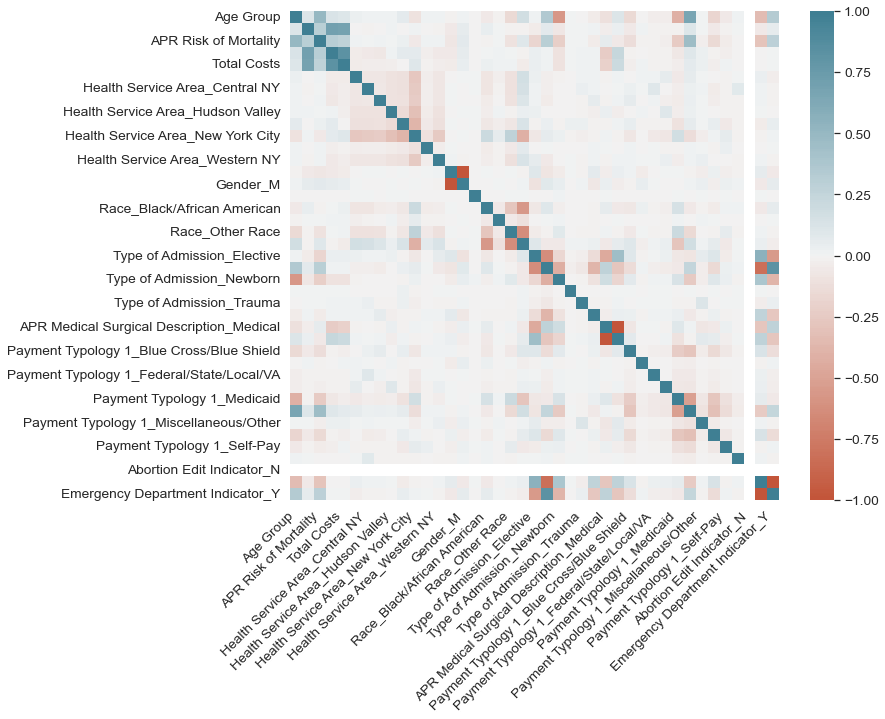

In [45]:
f, ax = plt.subplots(figsize=(11, 9))
corr = encoded_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Preliminary Modeling
Prepare data for predictive modeling
- Training data seprated from labels by dropping label column and dropping certain columns (e.g. total charges and total costs).
- Split data into train and test set to use for the remainder

In [48]:
X = encoded_df.drop(['Length of Stay','Total Charges','Total Costs'], axis=1) #remove data leakage features
y = encoded_df[['Length of Stay']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Linear Regression

In [49]:
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = accuracy_score(y_test, y_round_pred)
train_acc = accuracy_score(y_train, y_round_train_pred)
print(mse_test)
print(mse_train)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

52.02249087818287
52.64591654529456
Test accuracy: 0.13620249705763895
Train accuracy: 0.13635049531762905


# PCA

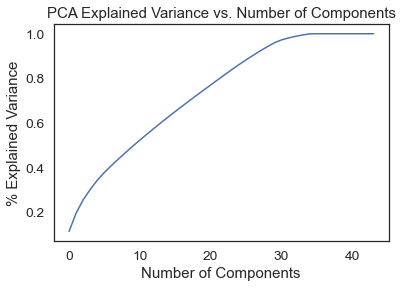

In [50]:
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca1 = PCA()
pca1.fit(x_train)
explained_variance_ratio = pca1.explained_variance_ratio_
pc_vs_variance = np.cumsum(pca1.explained_variance_ratio_)
plt.plot(pc_vs_variance)
plt.xlabel('Number of Components')
plt.ylabel('% Explained Variance')
plt.title('PCA Explained Variance vs. Number of Components')
plt.show()

In [ ]:
variance_95 = list(filter(lambda i: i > 0.95, pc_vs_variance))[0]
component_95 = pc_vs_variance.tolist().index(variance_95)
print(component_95)

#perform the dimensionality reduction
pca2 = PCA(n_components=component_95)
x_train = pca2.fit_transform(x_train)
x_test = pca2.transform(x_test)

29


## Which are the most important features?

In [ ]:
pc_df = pd.DataFrame(pca2.components_,columns=X_train.columns)
top_pc = pc_df[0:1]
display(top_pc)

Facility Id  Age Group  CCS Diagnosis Code  CCS Procedure Code  \
0     0.064339  -0.311568            0.136059            0.114077   

   APR DRG Code  APR MDC Code  APR Severity of Illness Code  \
0      0.220447      0.218095                     -0.246361   

   APR Risk of Mortality  Health Service Area_Capital/Adiron  \
0              -0.279548                            -0.01268   

   Health Service Area_Central NY  ...  \
0                       -0.005671  ...   

   Payment Typology 1_Managed Care, Unspecified  Payment Typology 1_Medicaid  \
0                                      0.015186                     0.143137   

   Payment Typology 1_Medicare  Payment Typology 1_Miscellaneous/Other  \
0                    -0.274681                                0.010346   

   Payment Typology 1_Private Health Insurance  Payment Typology 1_Self-Pay  \
0                                     0.102056                     0.012309   

   Payment Typology 1_Unknown  Abortion Edit Indicator_N  \
0                     0.00054                        0.0   

   Emergency Department Indicator_N  Emergency Department Indicator_Y  
0                          0.358124                         -0.358124  

[1 rows x 44 columns]

In [53]:
new_top_pc = top_pc.abs()
features = []
for i in range(0,10):
  features.append(new_top_pc.idxmax(axis=1).tolist())
  new_top_pc = new_top_pc.drop(columns=features[i])
print(features)

[['Emergency Department Indicator_Y'], ['Emergency Department Indicator_N'], ['Type of Admission_Emergency'], ['Age Group'], ['APR Risk of Mortality'], ['Payment Typology 1_Medicare'], ['APR Severity of Illness Code'], ['Type of Admission_Newborn'], ['APR DRG Code'], ['APR MDC Code']]


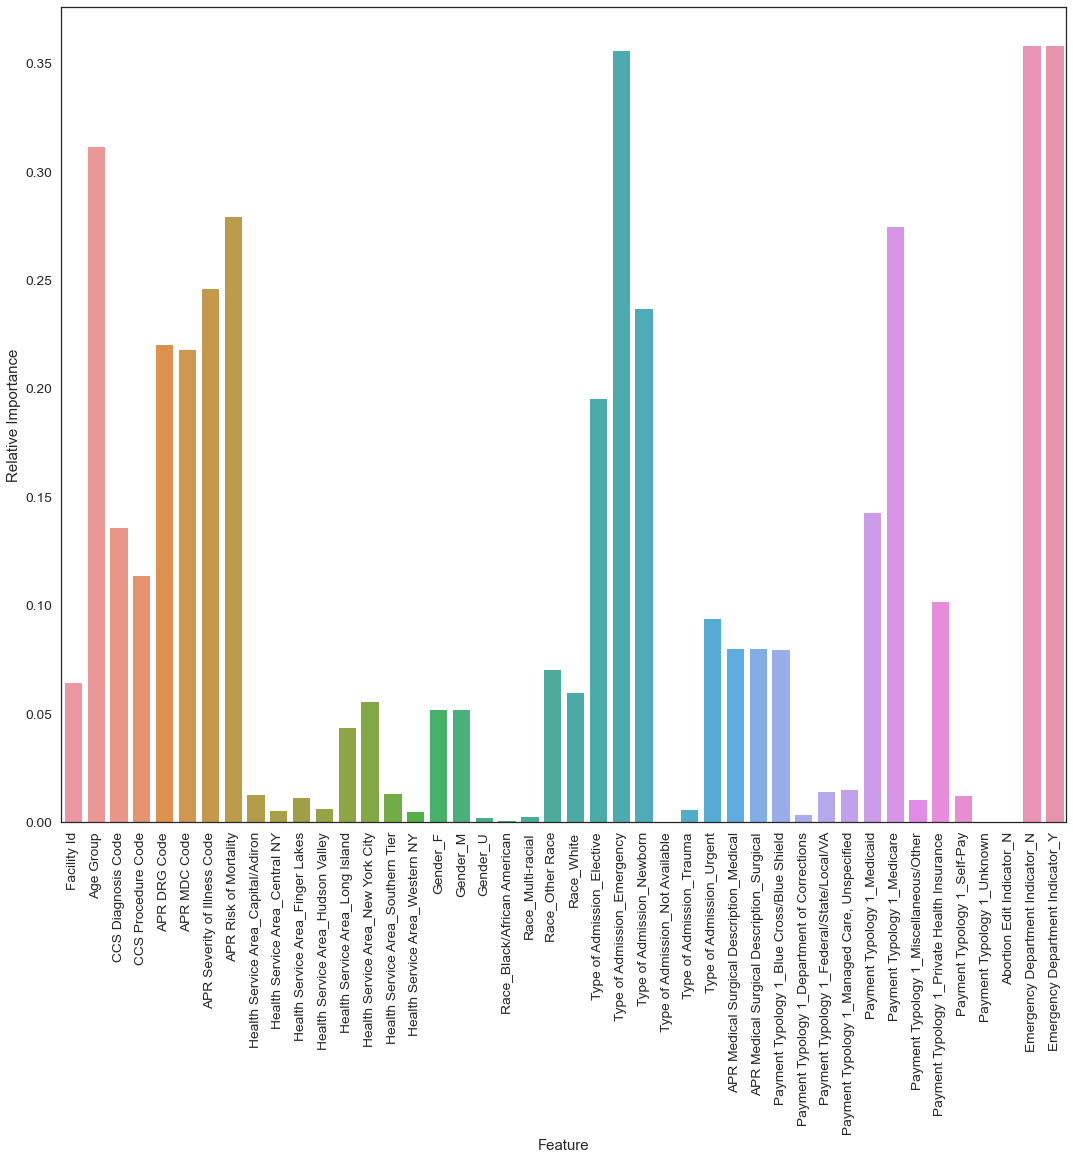

In [54]:
top_pc = top_pc.abs()
list_magnitude = top_pc.loc[0, :].values.tolist()
labels = top_pc.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': labels, 'Relative Importance': list_magnitude})

fig, ax =plt.subplots(figsize=(18,15))
sns.barplot(x='Feature', y='Relative Importance', data=feature_importance_df.reset_index())
plt.xticks(rotation=90)
plt.show()

# Decision Tree

In [55]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.8196442447153311
Test Accuracy: 0.26663981658452723


We can see a high train accuracy but low test accuracy, probably due to no parameter optimisation and overfitting.

In [56]:
dtree=DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=150)
dtree.fit(x_train,y_train)

train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.26828271590932656
Test Accuracy: 0.2678210304454315


In [57]:
clf=DecisionTreeRegressor(max_depth=10, max_leaf_nodes=150)
clf.fit(x_train,y_train)
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

mse_test = mean_squared_error(y_test, test_pred)
mse_train = mean_squared_error(y_train, train_pred)
y_round_pred = np.ndarray.round(test_pred)
y_round_train_pred = np.ndarray.round(train_pred)
test_acc = accuracy_score(y_test, y_round_pred)
train_acc = accuracy_score(y_train, y_round_train_pred)
print(mse_test)
print(mse_train)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

50.887716375608484
50.66469750661623
Test accuracy: 0.13954262830046096
Train accuracy: 0.14040769623934313


# Label/Predictor Construction
- From EDA, found huge class imbalance in dataset given most of the length of stays are in 1-5 day range
- Try to deal with class imbalance after seeing it affect model performance.
- Going to create bins as following: 0-3, 3-6, 6-9, 9-13, 13-20, 20-50, 50-120+ (in days)

In [58]:
bins = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100,120]
encoded_df['stay_bin']=pd.cut(x = encoded_df['Length of Stay'],
                        bins = bins)
encoded_df['stay_label']=pd.cut(x = encoded_df['Length of Stay'],
                        bins = bins,
                        labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
encoded_df['stay_bin'] = encoded_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
encoded_df['stay_bin'] = encoded_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
encoded_df.head()

Facility Id  Age Group  Length of Stay  CCS Diagnosis Code  \
0         66.0          4               5                 657   
1         66.0          2               8                 657   
2         66.0          3               8                 657   
3         66.0          4               4                 128   
4        103.0          4               3                  83   

   CCS Procedure Code  APR DRG Code  APR MDC Code  \
0                   0           753            19   
1                   0           753            19   
2                   0           753            19   
3                   0           141             4   
4                   0            53             1   

   APR Severity of Illness Code  APR Risk of Mortality  Total Charges  ...  \
0                             1                      1        5620.00  ...   
1                             2                      1        7404.18  ...   
2                             1                      1        7931.28  ...   
3                             1                      1       11304.44  ...   
4                             2                      2        8330.50  ...   

   Payment Typology 1_Medicare  Payment Typology 1_Miscellaneous/Other  \
0                            0                                       0   
1                            0                                       0   
2                            0                                       0   
3                            1                                       0   
4                            0                                       0   

   Payment Typology 1_Private Health Insurance  Payment Typology 1_Self-Pay  \
0                                            0                            0   
1                                            0                            0   
2                                            0                            0   
3                                            0                            0   
4                                            0                            0   

   Payment Typology 1_Unknown  Abortion Edit Indicator_N  \
0                           0                          1   
1                           0                          1   
2                           0                          1   
3                           0                          1   
4                           0                          1   

   Emergency Department Indicator_N  Emergency Department Indicator_Y  \
0                                 0                                 1   
1                                 0                                 1   
2                                 0                                 1   
3                                 0                                 1   
4                                 0                                 1   

   stay_bin  stay_label  
0   (4 - 5]           4  
1   (7 - 8]           7  
2   (7 - 8]           7  
3   (3 - 4]           3  
4   (2 - 3]           2  

[5 rows x 49 columns]

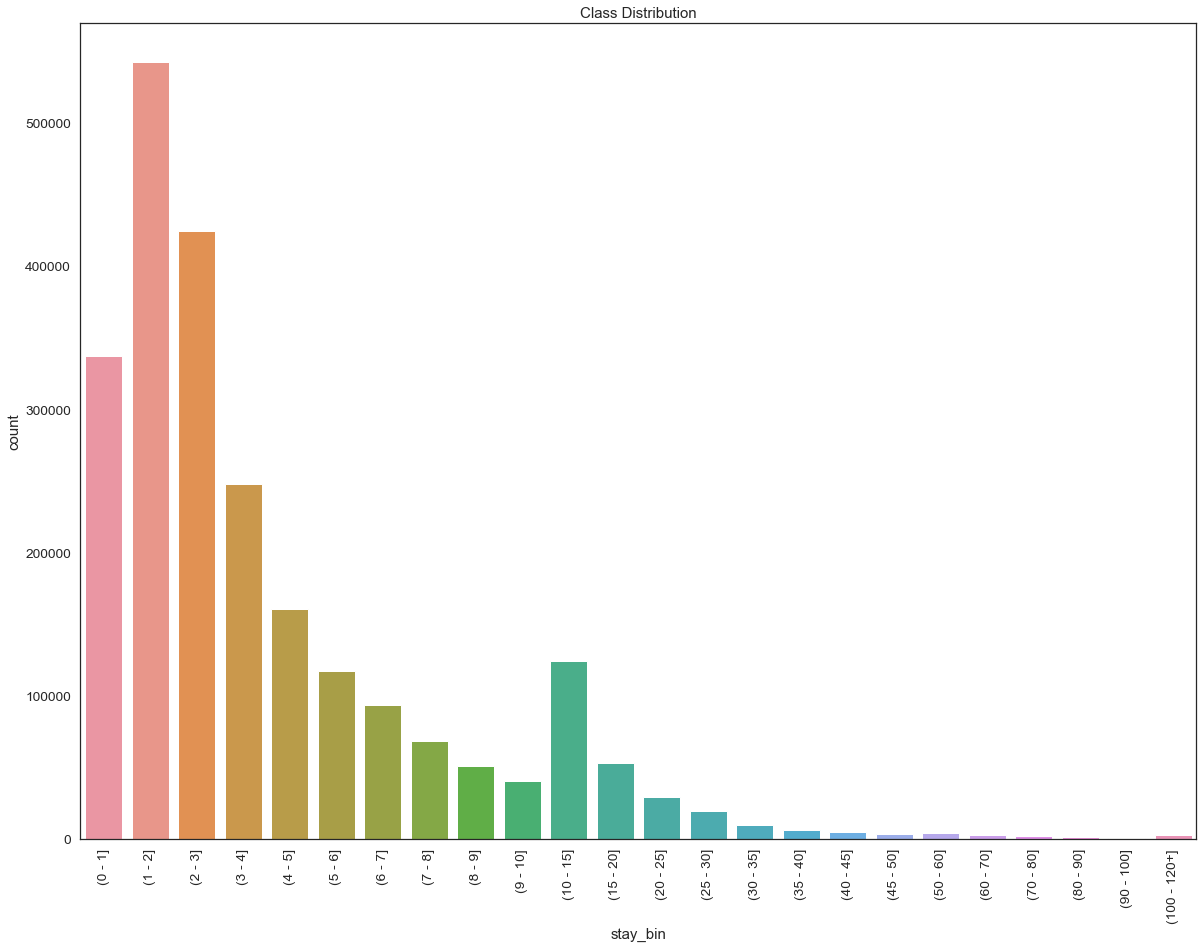

In [59]:
f, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x='stay_bin', data = encoded_df)
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.show()

Run another decision tree classifier and see if the model improves

In [62]:
#create train and test sets
new_X = encoded_df.drop(['Length of Stay','Total Charges','Total Costs','stay_bin','stay_label'], axis=1)
new_y = encoded_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca = PCA(n_components=44)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [63]:
dtree=DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=300)
dtree.fit(x_train,y_train)

train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.29385491420227694
Test Accuracy: 0.2915918920342068


C:\Users\boco7097\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


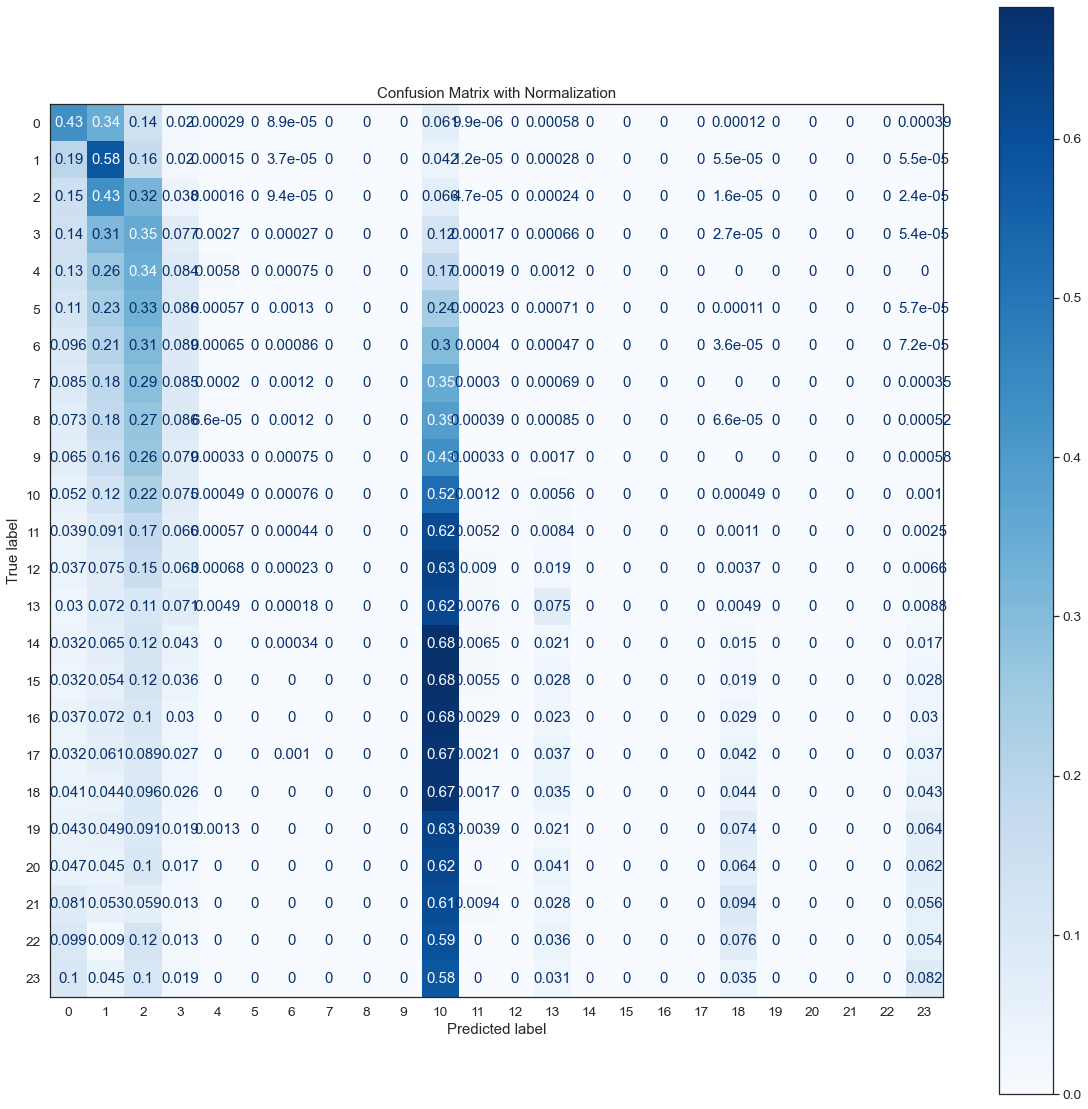

In [64]:
f, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(dtree, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix with Normalization')
plt.show()

In [65]:
counts = y_train['stay_label'].value_counts().tolist()
print(counts)

resample_dict = {0:112307, 1:112307, 2:112307, 3:112307} #resample the first four classes to have the same number of instances as the (10-15] bucket
rus = RandomUnderSampler(random_state=0, sampling_strategy=resample_dict)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)
unique_elements, counts_elements = np.unique(y_resampled, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[379321, 296726, 236314, 173049, 112285, 86908, 81999, 65468, 47625, 36780, 35687, 28251, 20519, 13384, 6659, 4211, 3127, 2841, 2259, 1978, 1729, 1132, 766, 536]
[[     0      1      2      3      4      5      6      7      8      9
      10     11     12     13     14     15     16     17     18     19
      20     21     22     23]
 [112307 112307 112307 112307 112285  81999  65468  47625  35687  28251
   86908  36780  20519  13384   6659   4211   3127   2259   2841   1729
    1132    766    536   1978]]


In [66]:
#Now lets run the decision tree and confusion matrix again
dtree=DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=300)
dtree.fit(x_resampled,y_resampled)

train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.2693604480242798
Test Accuracy: 0.26758194137479063


C:\Users\boco7097\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


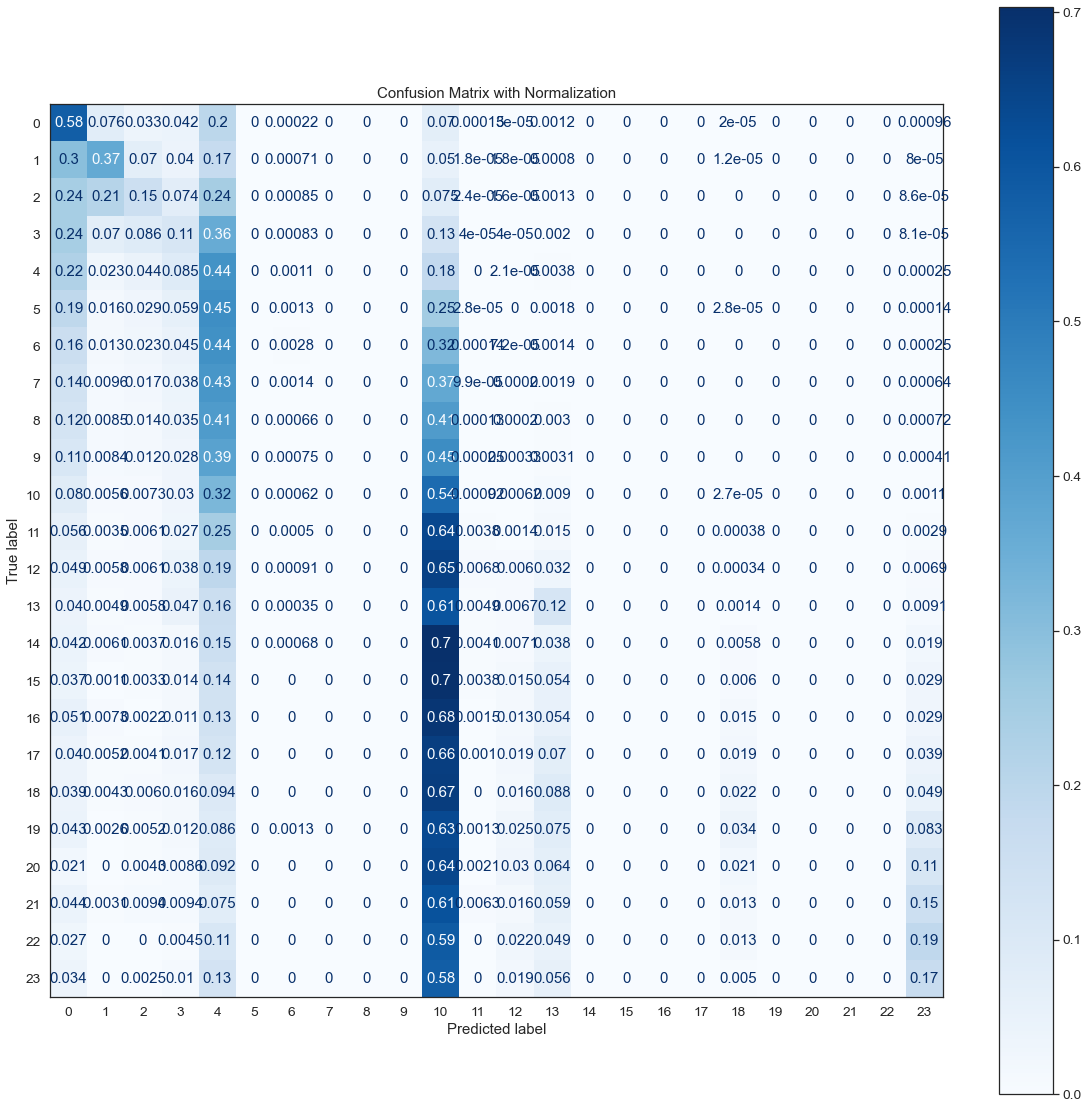

In [67]:
f, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(dtree, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix with Normalization')
plt.show()

In [68]:
from collections import Counter 
counts = y_train['stay_label'].value_counts().tolist()
print(counts)

resample_dict = {0:1000, 1:1000, 2:1000, 3:1000, 4:1000, 5:1000, 6:1000, 7:1000, 8:1000, 9:1000, 10:1000, 11:1000, 12:1000, 13:1000,
                 14:1000, 15:1000, 16:1000, 17:1000, 18:1000, 19:1000, 20:1000, 23:1000 } #lets take everything down to the 14th bucket size = 6785
rus = RandomUnderSampler(random_state=0, sampling_strategy=resample_dict)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)
unique_elements, counts_elements = np.unique(y_resampled, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[379321, 296726, 236314, 173049, 112285, 86908, 81999, 65468, 47625, 36780, 35687, 28251, 20519, 13384, 6659, 4211, 3127, 2841, 2259, 1978, 1729, 1132, 766, 536]
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23]
 [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
  1000 1000 1000 1000 1000 1000 1000  766  536 1000]]


In [69]:
#Now lets run the decision tree and confusion matrix again

dtree=DecisionTreeClassifier(max_depth= 30, max_leaf_nodes=500)
dtree.fit(x_resampled,y_resampled)

train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.17279455266493204
Test Accuracy: 0.17109384672967423


C:\Users\boco7097\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


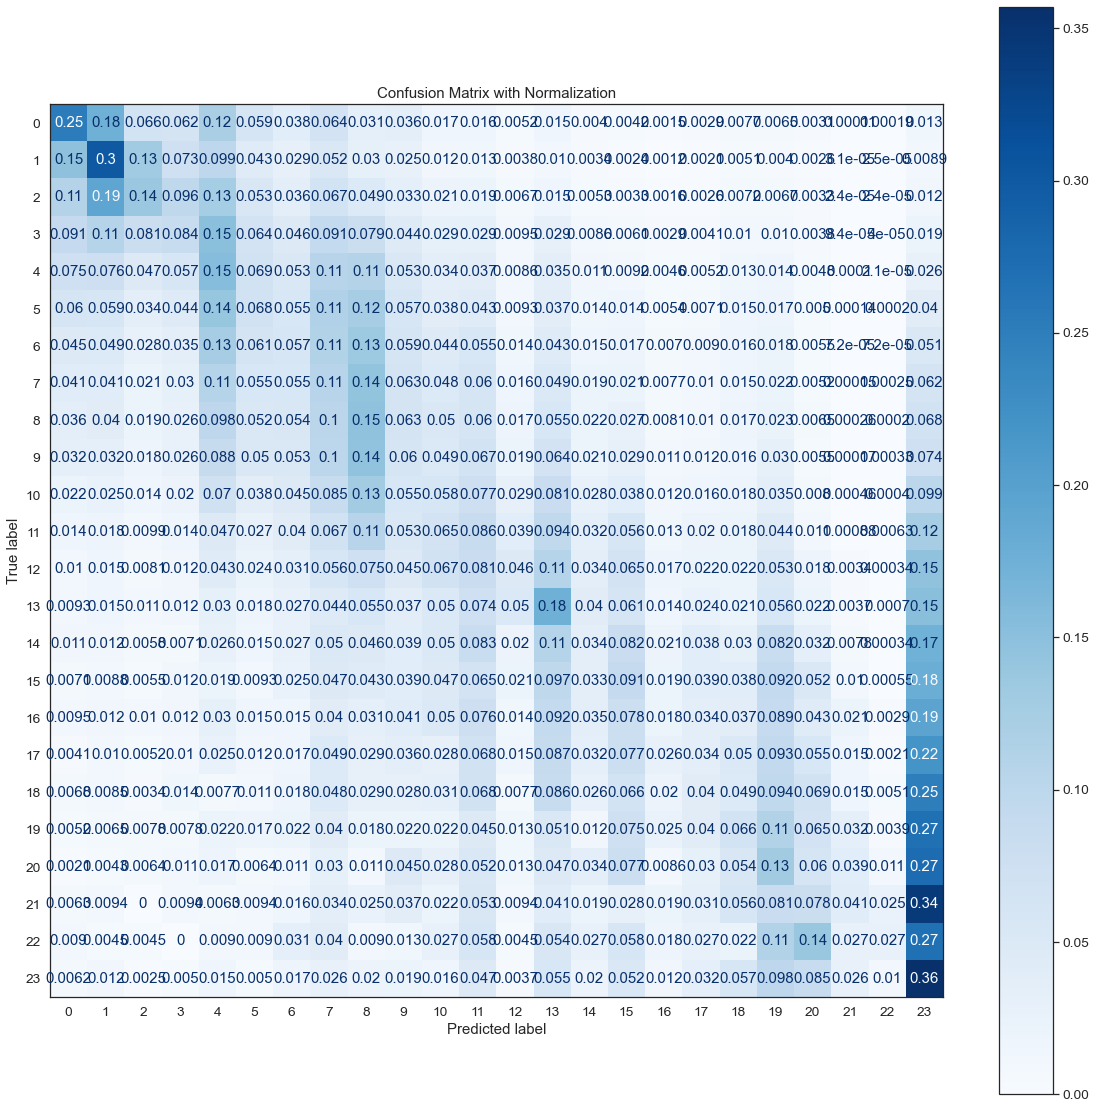

In [70]:
f, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(dtree, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix with Normalization')
plt.show()

In [71]:
#perform decision tree classification no undersampling with non-pca data
dtree=DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=300)
dtree.fit(X_train,y_train)

train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.3115030063053733
Test Accuracy: 0.3108428316684859


C:\Users\boco7097\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\boco7097\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


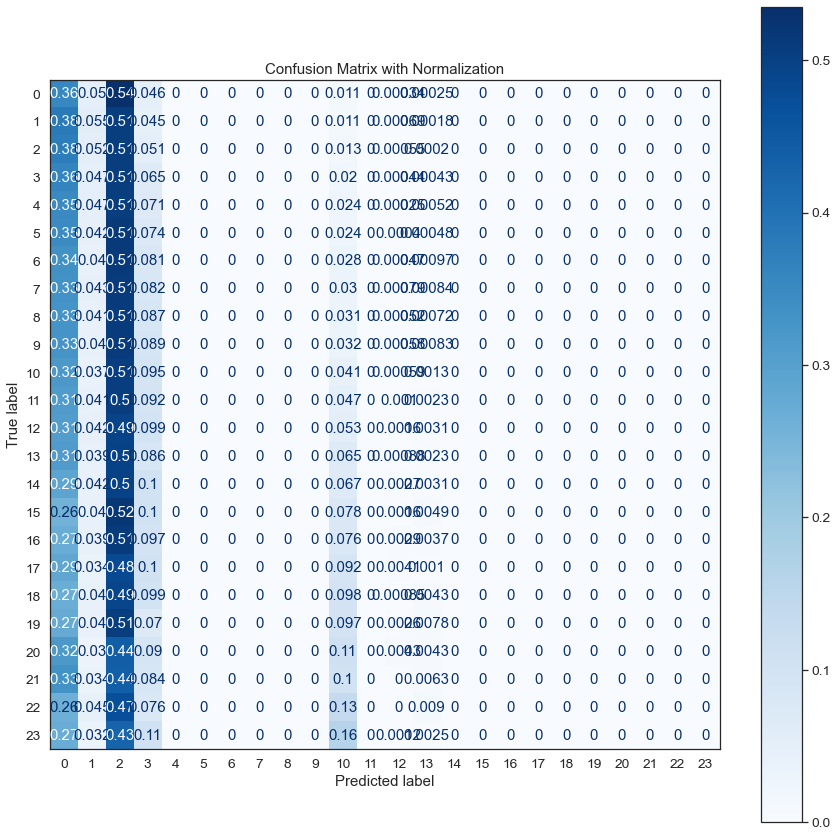

In [72]:
#Create confusion matrix
f, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(dtree, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix with Normalization')
plt.show()

In [73]:
bins = [0,5,10,20,30,50,120]
labels = [5,10,20,30,50,120]
encoded_df['stay_bin']=pd.cut(x = encoded_df['Length of Stay'], #encoded df is the raw dataframe following one-hot encoding
                        bins = bins)
encoded_df['stay_label']=pd.cut(x = encoded_df['Length of Stay'],
                        bins = bins,
                        labels = labels) #lets also rename our bins to be more descriptive since now they are much larger
encoded_df['stay_bin'] = encoded_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
encoded_df['stay_bin'] = encoded_df['stay_bin'].apply(lambda x: str(x).replace('120','120+')) #make this bin more descriptive
display(encoded_df)

Facility Id  Age Group  Length of Stay  CCS Diagnosis Code  \
0               66.0          4               5                 657   
1               66.0          2               8                 657   
2               66.0          3               8                 657   
3               66.0          4               4                 128   
4              103.0          4               3                  83   
...              ...        ...             ...                 ...   
2346755        943.0          5               2                 112   
2346756        943.0          4               1                  54   
2346757        943.0          4               2                 657   
2346758        943.0          5               1                 106   
2346759        943.0          3               1                 231   

         CCS Procedure Code  APR DRG Code  APR MDC Code  \
0                         0           753            19   
1                         0           753            19   
2                         0           753            19   
3                         0           141             4   
4                         0            53             1   
...                     ...           ...           ...   
2346755                   0            47             1   
2346756                 159           351             8   
2346757                   0           751            19   
2346758                   0           201             5   
2346759                   0           144             4   

         APR Severity of Illness Code  APR Risk of Mortality  Total Charges  \
0                                   1                      1        5620.00   
1                                   2                      1        7404.18   
2                                   1                      1        7931.28   
3                                   1                      1       11304.44   
4                                   2                      2        8330.50   
...                               ...                    ...            ...   
2346755                             2                      2       43494.00   
2346756                             1                      1       16662.00   
2346757                             1                      1        7142.00   
2346758                             1                      2       13070.00   
2346759                             1                      1       14637.00   

         ...  Payment Typology 1_Medicare  \
0        ...                            0   
1        ...                            0   
2        ...                            0   
3        ...                            1   
4        ...                            0   
...      ...                          ...   
2346755  ...                            1   
2346756  ...                            0   
2346757  ...                            0   
2346758  ...                            1   
2346759  ...                            0   

         Payment Typology 1_Miscellaneous/Other  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
2346755                                       0   
2346756                                       0   
2346757                                       0   
2346758                                       0   
2346759                                       0   

         Payment Typology 1_Private Health Insurance  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...     

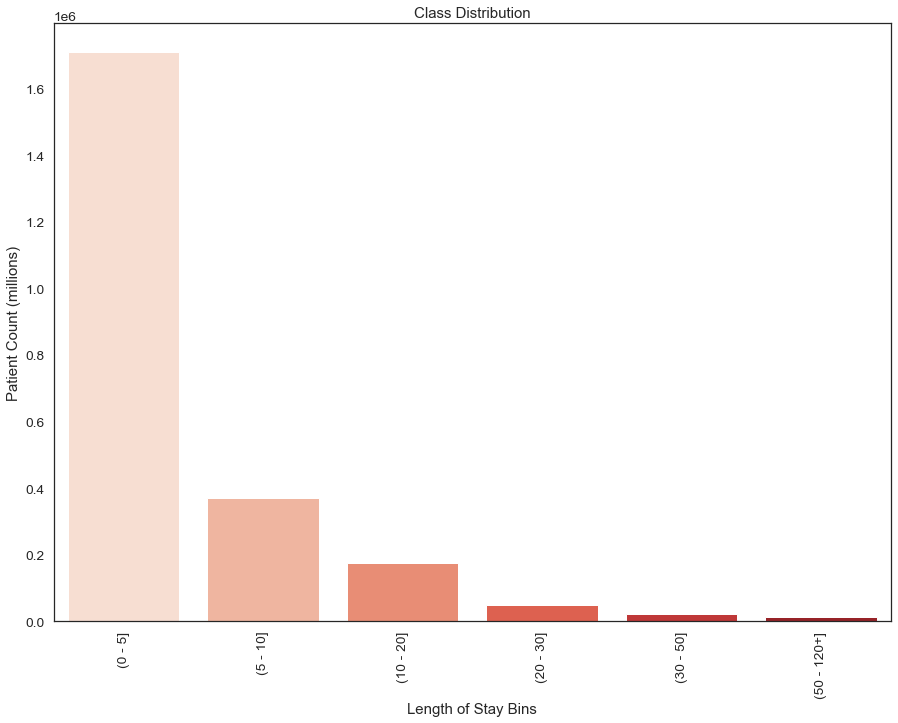

In [74]:
f, ax = plt.subplots(figsize=(15, 11))
sns.countplot(x='stay_bin', data = encoded_df, palette='Reds')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.xlabel('Length of Stay Bins')
plt.ylabel('Patient Count (millions)')
plt.show()

In [75]:
#create train and test sets
new_X = encoded_df.drop(['Length of Stay','Total Charges','Total Costs','stay_bin','stay_label'], axis=1)
new_y = encoded_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

#perform pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca = PCA(n_components=29)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [76]:
#logisitic regression without class balance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

log_reg = LogisticRegression(multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)

print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

Test accuracy: 0.7329987035110515
Train accuracy: 0.7323839288001494


C:\Users\boco7097\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


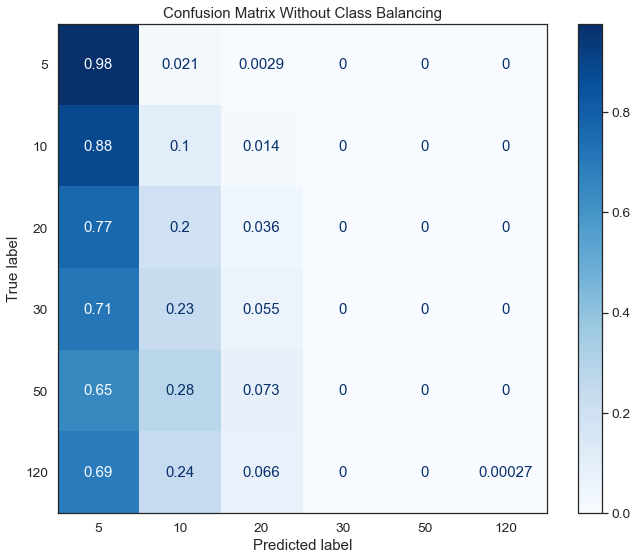

In [77]:
#Create confusion matrix for no class balancing
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(11, 9))
plot_confusion_matrix(log_reg, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix Without Class Balancing')
plt.show()

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

C:\Users\boco7097\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           5       0.76      0.98      0.86    514073
          10       0.30      0.10      0.15    110799
          20       0.29      0.04      0.06     52600
          30       0.00      0.00      0.00     14490
          50       0.00      0.00      0.00      7057
         120       1.00      0.00      0.00      3648

    accuracy                           0.73    702667
   macro avg       0.39      0.19      0.18    702667
weighted avg       0.63      0.73      0.66    702667



C:\Users\boco7097\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\boco7097\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
#logistic regression - works better with standardized but no PCA performed on data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

log_reg = LogisticRegression(class_weight='balanced', multi_class='ovr').fit(x_train, y_train)
y_train_pred = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, y_train_pred)

print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

Test accuracy: 0.5900376707601183
Train accuracy: 0.5895530125875695


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.89      0.70      0.78    514073
          10       0.28      0.35      0.31    110799
          20       0.18      0.15      0.16     52600
          30       0.07      0.21      0.11     14490
          50       0.04      0.12      0.06      7057
         120       0.03      0.35      0.05      3648

    accuracy                           0.59    702667
   macro avg       0.25      0.32      0.25    702667
weighted avg       0.71      0.59      0.64    702667



C:\Users\boco7097\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


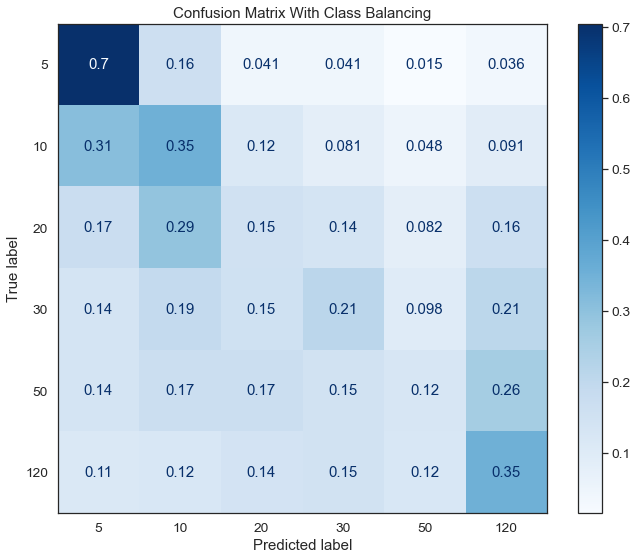

In [81]:
from sklearn.metrics import plot_confusion_matrix
f, ax = plt.subplots(figsize=(11, 9))
plot_confusion_matrix(log_reg, x_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.title('Confusion Matrix With Class Balancing')
plt.show()

In [82]:
#overfit tree
dtree=DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_train,y_train)

train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.9252540629951804
Test Accuracy: 0.6670485450433847


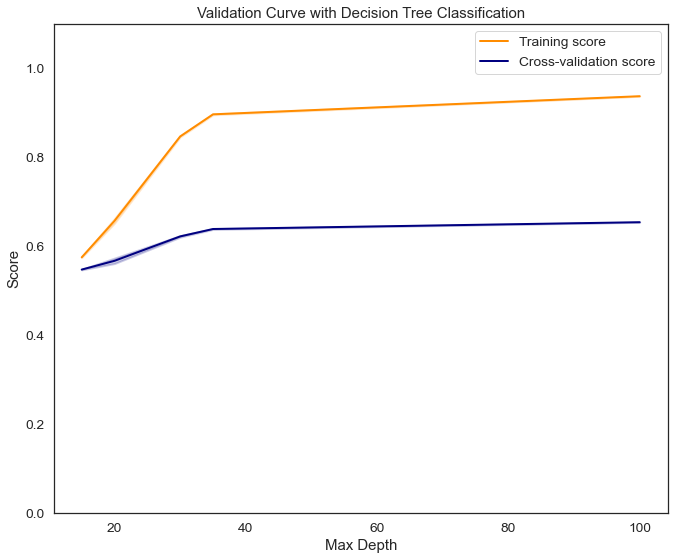

In [83]:
param_range = [15,20,30,35,100]
train_scores, test_scores = validation_curve(dtree, x_train, y_train, param_name='max_depth', 
                                             param_range=param_range, cv=3, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(11,9))
plt.title("Validation Curve with Decision Tree Classification")
plt.xlabel('Max Depth')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

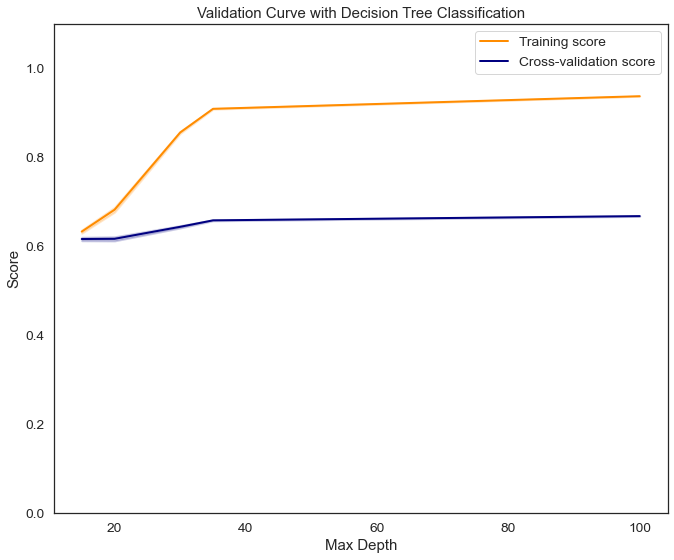

In [84]:
dtree=DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_train,y_train)
param_range = [15,20,30,35,100]
train_scores, test_scores = validation_curve(dtree, X_train, y_train, param_name='max_depth', 
                                             param_range=param_range, cv=3, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(11,9))
plt.title("Validation Curve with Decision Tree Classification")
plt.xlabel('Max Depth')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
#try a randomized search on decision tree with 3-fold cross validation
*** 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
search_vals = dict(max_depth=[35,50,75,100], max_leaf_nodes=[800,1000,1500,2000])
dtree_search = RandomizedSearchCV(dtree, search_vals, cv=3)
search = dtree_search.fit(X_train,y_train)
search.best_params_
***

In [86]:
#decision tree optimal parameters

dtree=DecisionTreeClassifier(max_depth= 50, max_leaf_nodes=1000, class_weight='balanced')
dtree.fit(X_train,y_train)

train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.6218502104840706
Test Accuracy: 0.6190386057691624


In [87]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           5       0.93      0.71      0.81    514073
          10       0.28      0.41      0.33    110799
          20       0.23      0.28      0.25     52600
          30       0.15      0.26      0.19     14490
          50       0.08      0.32      0.12      7057
         120       0.09      0.56      0.15      3648

    accuracy                           0.62    702667
   macro avg       0.29      0.42      0.31    702667
weighted avg       0.74      0.62      0.67    702667



In [88]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=15, class_weight='balanced')
rf.fit(X_train,y_train)

train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.6734593676085082
Test Accuracy: 0.645675689907168


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           5       0.92      0.73      0.82    514073
          10       0.29      0.48      0.37    110799
          20       0.28      0.29      0.28     52600
          30       0.18      0.25      0.21     14490
          50       0.10      0.30      0.15      7057
         120       0.12      0.53      0.19      3648

    accuracy                           0.65    702667
   macro avg       0.32      0.43      0.34    702667
weighted avg       0.75      0.65      0.68    702667



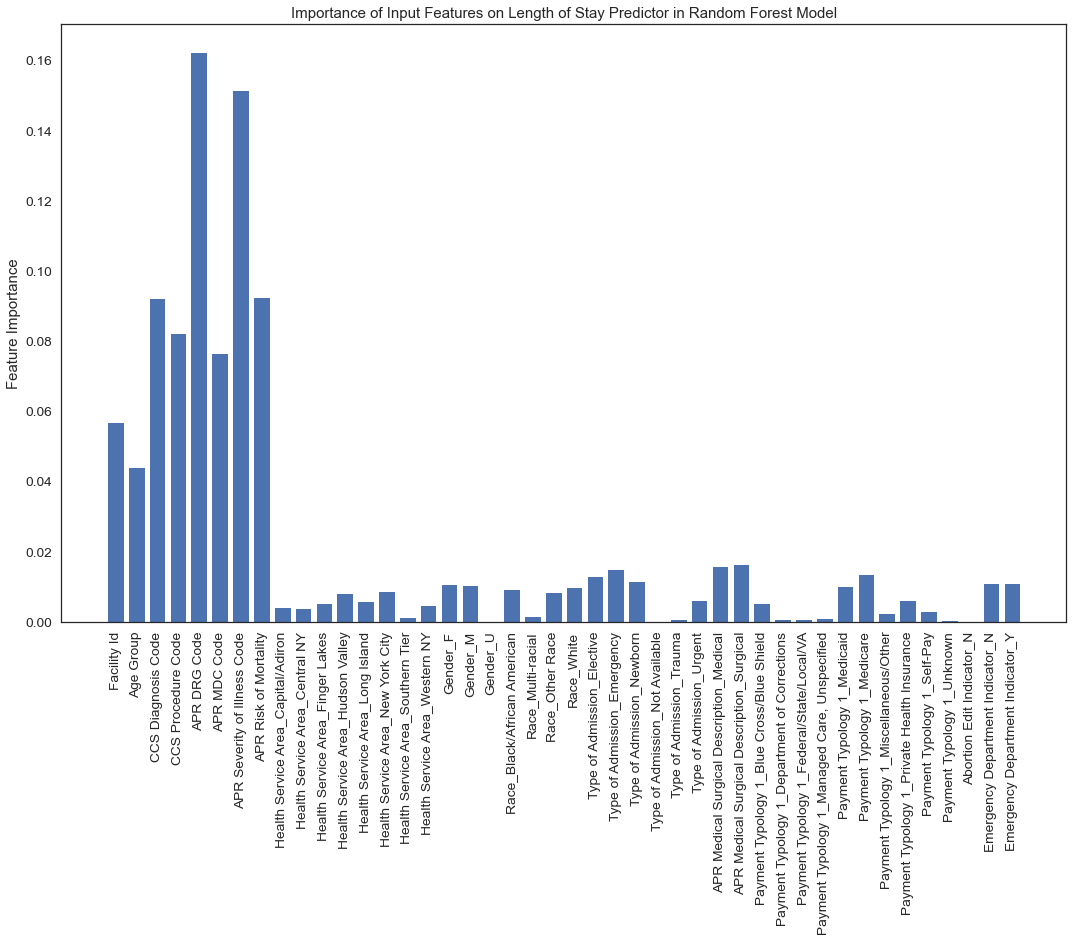

In [90]:
feat_importances = rf.feature_importances_
feat_names = X_train.columns.tolist()

plt.subplots(figsize=(18,11))
plt.xticks(rotation=90)
plt.bar(x=feat_names, height=feat_importances)
plt.title('Importance of Input Features on Length of Stay Predictor in Random Forest Model')
plt.ylabel('Feature Importance')
plt.show()

In [92]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(random_state = 1, class_weight = "balanced", max_depth = 15)
boost = AdaBoostClassifier(dtree, n_estimators=75, random_state=0)
boost.fit(X_train, y_train)

train_predictions = boost.predict(X_train)
test_predictions = boost.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, train_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))

Train Accuracy: 0.7234199056572702
Test Accuracy: 0.6189873723968822


In [93]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           5       0.84      0.74      0.79    514073
          10       0.22      0.33      0.27    110799
          20       0.23      0.27      0.25     52600
          30       0.20      0.15      0.17     14490
          50       0.14      0.11      0.13      7057
         120       0.20      0.21      0.20      3648

    accuracy                           0.62    702667
   macro avg       0.30      0.30      0.30    702667
weighted avg       0.67      0.62      0.64    702667

